In [2]:
import os
import sys
import torch
import time

sys.path.insert(0,os.path.abspath('/notebooks/4901_revisit_cdtran'))
sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
from tqdm.notebook import tqdm
# from torch_timeseries.dataset import *
# from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast
# from src.experiments.CiDPG import CiDPGForecast


# from src.experiments.iTransformer import iTransformerExp
# exp = DLinearForecast(data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
# exp = DLinearForecast(dataset_type="ExchangeRate", data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
# exp = PatchTSTForecast(dataset_type="ExchangeRate", data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
# exp = CiDPGForecast(dataset_type="ETTh1", windows=336, pred_len=720, start_d_model=128, end_d_model=512, patch_len=96, stride=48, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
# # exp.run()

# exp._setup_run(1000)
# exp._resume_run(1000)

# 1 Show

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import torch
import time

sys.path.insert(0,os.path.abspath('/notebooks/4901_revisit_cdtran'))
sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
from tqdm.notebook import tqdm


def xy_plot(x, y, pred_y, title=None, y_label=None):
    with plt.style.context(['science', 'notebook']):

        fig, ax = plt.subplots()
        
        x_ticks = np.arange(len(x))
        y_ticks = np.arange(len(x), len(x)+len(y))
        
        # 设置边框粗度
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # 设置边框粗度为2

        
        ax.plot(x_ticks, x, label='lookback', linewidth=3)
        ax.plot(y_ticks, y, label='ground_truth', linewidth=3)
        ax.plot(y_ticks, pred_y, label='prediction', linewidth=3)
    if y_label: plt.ylabel(y_label)
    if title: plt.title(title)
    plt.legend()


In [44]:
import matplotlib.pyplot as plt
import scienceplots

# plt.style.use(['science', 'ieee', 'notebook'])
with plt.style.context(['science', 'notebook']):


SyntaxError: unexpected EOF while parsing (814454421.py, line 5)

import matplotlib.pyplot as plt

## 1.1 ETTh1

In [36]:
# from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

# exp = DLinearForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
# exp._setup_run(1)
# exp._resume_run(1)


Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh1/ETTh1.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/ETTh1/w336h1s336/c78847caac7f863aae50294f3df274f7/run_checkpoint.pth


In [38]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



In [39]:

b = 0
v = 0

plot_x = batch_x[b, :, 0].cpu().detach().numpy()
plot_y = batch_y[b, :, 0].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, 0].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

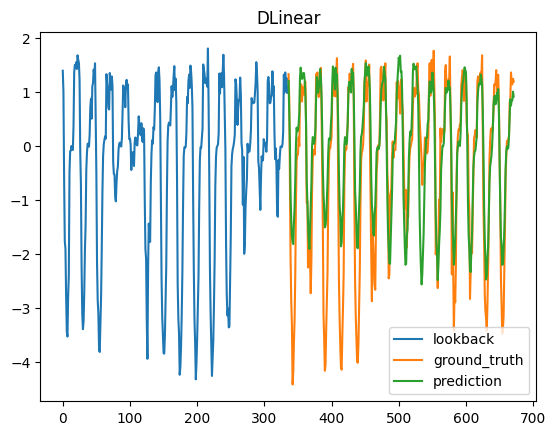

In [44]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### Informer

In [46]:
from torch_timeseries.experiments import InformerForecast

exp = InformerForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh1/ETTh1.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/Informer/ETTh1/w336h1s336/38707129df450ba501e1d3a49aca38ad/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

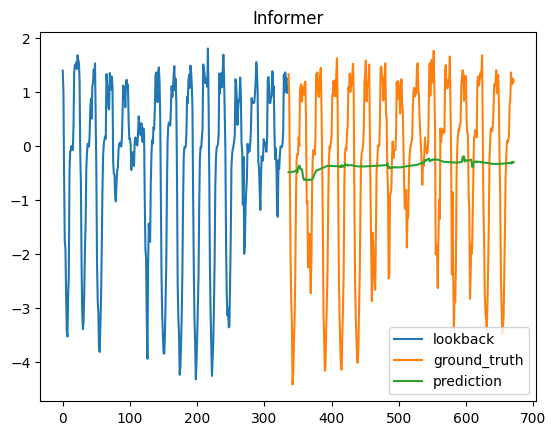

In [47]:
plot_pred_y = pred_y[b, :, 0].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('Informer')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh1/ETTh1.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/ETTh1/w336h1s336/ffa81e5dcef0434e31bbd0fd8cda7d23/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

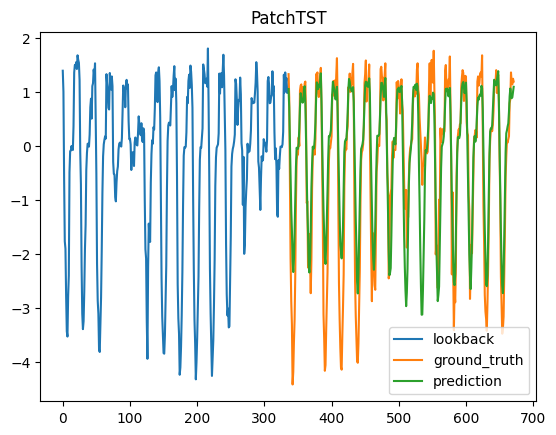

In [48]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, 0].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### TSMixer

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh1/ETTh1.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/TSMixer/ETTh1/w336h1s336/9184e37d86e367726e7d096ca433d706/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

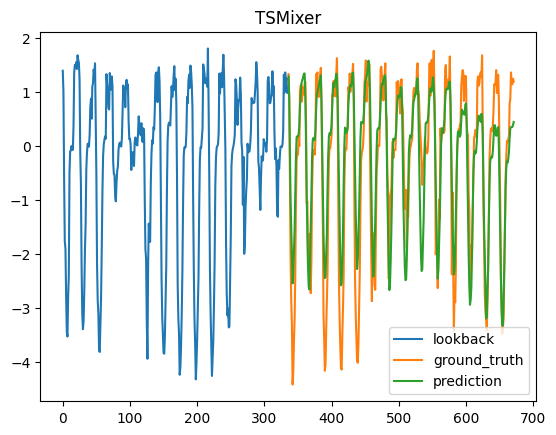

In [49]:
from torch_timeseries.experiments import TSMixerForecast

exp = TSMixerForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, 0].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('TSMixer')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh1/ETTh1.csv
train steps: 11523
val steps: 3149
test steps: 1407
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/ETTh1/w336h1s336/a4306d5b1036d7019dc0084262ef7957/run_checkpoint.pth


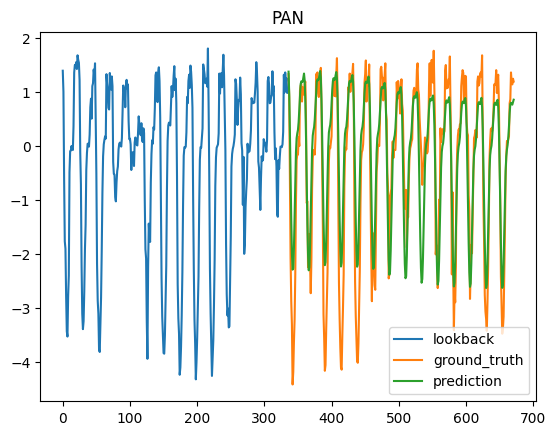

In [51]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type="ETTh1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, 0].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.2 ETTh2

In [6]:
dataset="ETTh2"

(array([[-1.5286043 , -0.85363402, -0.79263383, ..., -1.3958289 ,
          0.10889949, -0.40840346],
        [-1.6379221 , -0.89770036, -0.85805944, ..., -1.40547801,
          0.10889949, -0.40840346],
        [-1.77253669, -0.85363402, -0.83446532, ..., -1.62454889,
          0.11937946, -0.29273573],
        ...,
        [-2.23500473, -1.82047105, -1.23610408, ..., -1.5082233 ,
          0.0701934 , -1.00787618],
        [-2.20970813, -1.82047105, -1.21251021, ..., -1.51215448,
          0.0701934 , -1.02712486],
        [-2.52089775, -1.82047105, -1.31244522, ..., -1.79394466,
          0.0701934 , -1.08495873]]),
 array([[-2.52932994, -1.82047105, -1.42329588, ..., -1.58059188,
          0.09548509, -1.14270486],
        [-2.6807087 , -1.82047105, -1.53055324, ..., -1.34436687,
          0.08360779, -1.16199745],
        [-2.54609411, -1.82047105, -1.45604257, ..., -1.55968533,
          0.11784241, -0.9885835 ],
        ...,
        [-1.36889358, -0.26783115, -0.57818685, ..., -

In [58]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type="ETTh2", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

i = 100
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 6

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh2/ETTh2.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/ETTh2/w336h1s336/7d00c7c590404d053964cf97f0a63468/run_checkpoint.pth


/root/anaconda3/envs/testpyt/lib/python3.8/site-packages/torch_timeseries-0.1.5-py3.8.egg/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

### DLinear

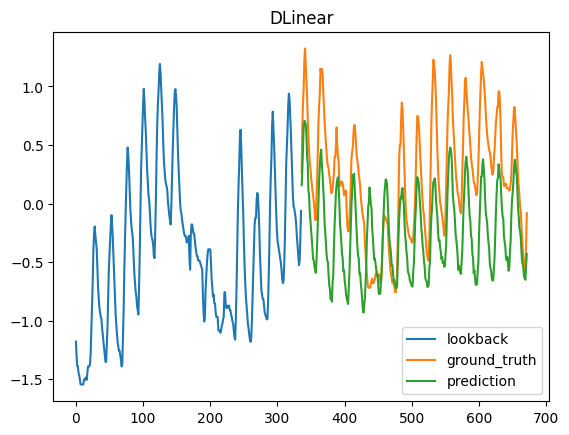

In [59]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh2/ETTh2.csv
train steps: 11523
val steps: 3149
test steps: 1407
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/ETTh2/w336h1s336/71edc9a6b211e2c2f7ccbdd6a85913a8/run_checkpoint.pth


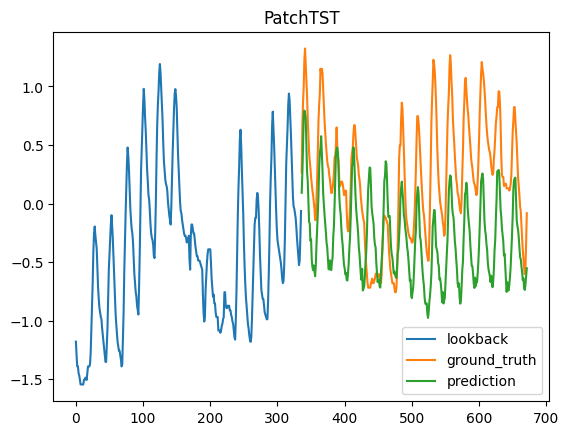

In [60]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTh2/ETTh2.csv
train steps: 11523
val steps: 3149
test steps: 1407
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/ETTh2/w336h1s336/544ddeb4ef72e6412f7c249d04d18318/run_checkpoint.pth


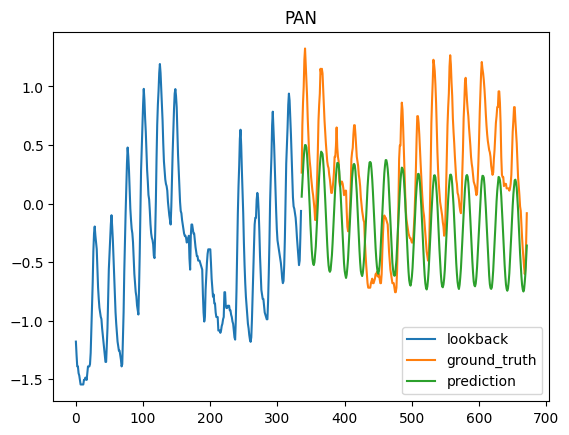

In [61]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(5)
exp._resume_run(5)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.3 ETTm1

In [62]:
dataset="ETTm1"

In [67]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type="ETTm1", windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

i = 0
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 6

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTm1/ETTm1.csv
train steps: 48105
val steps: 13601
test steps: 6633
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/ETTm1/w336h1s336/2eafcd670945df89ffe11ee7ff3ed66a/run_checkpoint.pth


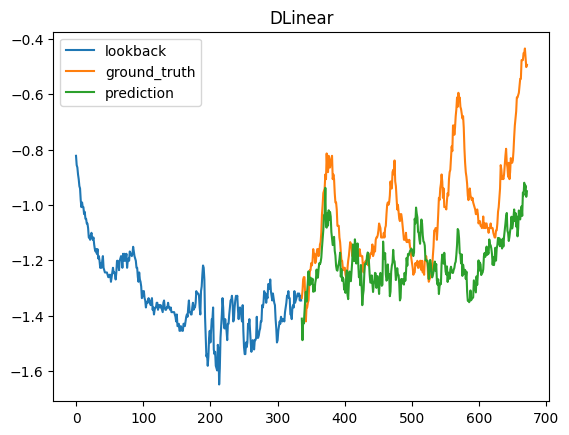

In [68]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTm1/ETTm1.csv


train steps: 48105
val steps: 13601
test steps: 6633
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/ETTm1/w336h1s336/ed6e25f66ebaa5d47742ff3cbf90fc39/run_checkpoint.pth


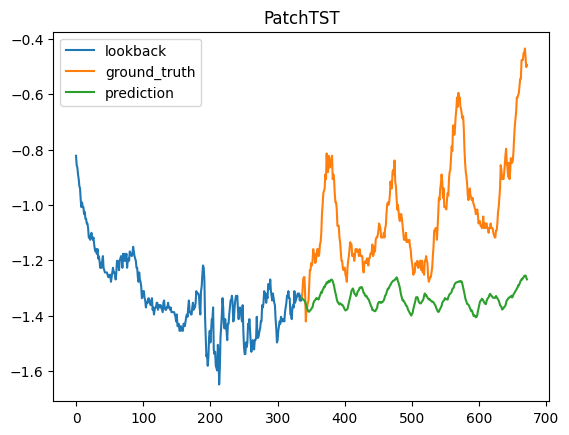

In [69]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ETTm1/ETTm1.csv
train steps: 48105
val steps: 13601
test steps: 6633
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/ETTm1/w336h1s336/cb831c91289550497b4c13eea14620c3/run_checkpoint.pth


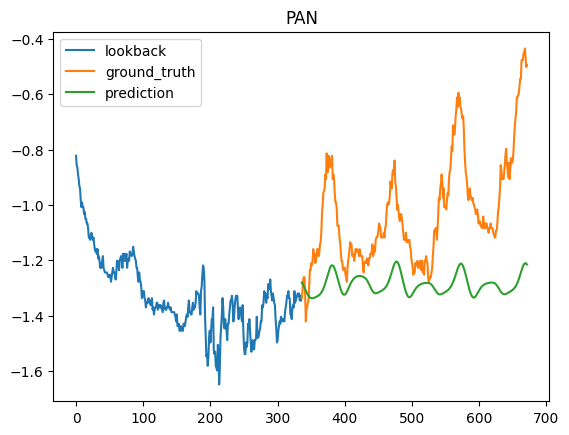

In [70]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=336, pred_len=336, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(5)
exp._resume_run(5)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.4 Weather

### DLinear

In [73]:
dataset= "Weather"

In [104]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 5

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/weather/weather.zip
Extracting /notebooks/pytorchtimseries/data/weather/weather.zip to /notebooks/pytorchtimseries/data/weather
train steps: 36456
val steps: 10444
test steps: 5175
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Weather/w336h1s96/6e821238bc0483c388eb5335e7baa211/run_checkpoint.pth


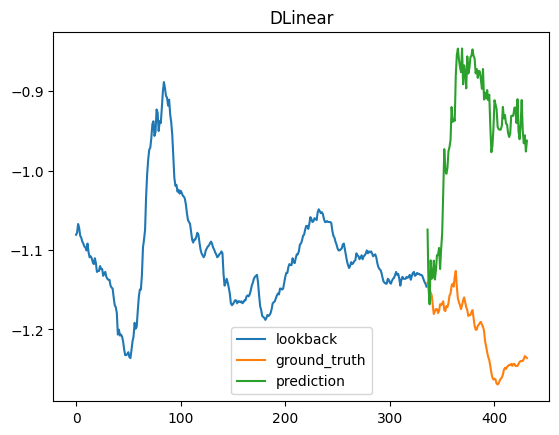

In [105]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/weather/weather.zip
Extracting /notebooks/pytorchtimseries/data/weather/weather.zip to /notebooks/pytorchtimseries/data/weather
train steps: 36456
val steps: 10444
test steps: 5175
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/Weather/w336h1s96/743bda00d8ced99f7bf2e647069102e4/run_checkpoint.pth


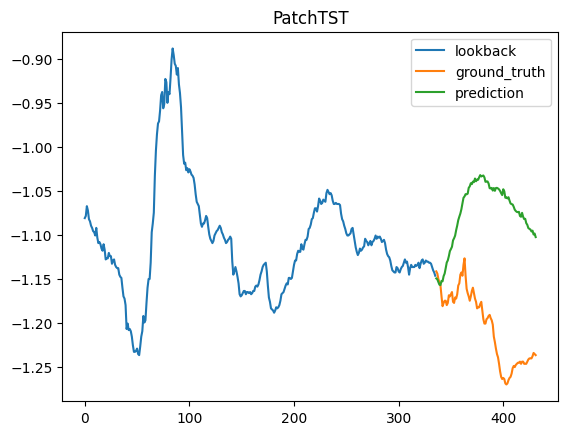

In [106]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/weather/weather.zip
Extracting /notebooks/pytorchtimseries/data/weather/weather.zip to /notebooks/pytorchtimseries/data/weather
train steps: 36456
val steps: 10444
test steps: 5175
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/Weather/w336h1s96/b103765a85951cd529ee4f46900efe72/run_checkpoint.pth


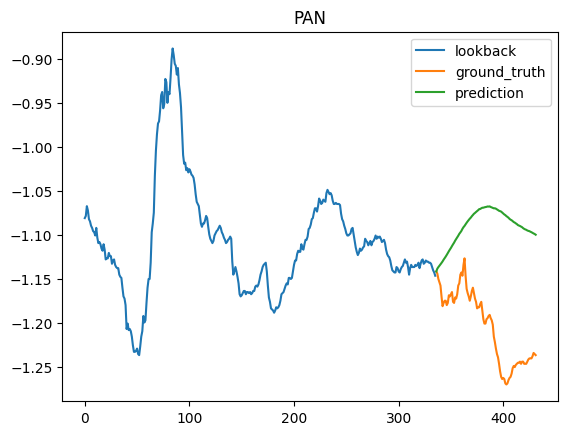

In [107]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(5)
exp._resume_run(5)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.5 ExchangeRate

In [110]:
dataset= "ExchangeRate"

In [138]:
len(exp.dataloader.test_loader.dataset)

41

In [140]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=720, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 0
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 5

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ExchangeRate/exchange_rate.csv
train steps: 4256
val steps: 798
test steps: 41
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/ExchangeRate/w336h1s720/48211ee8be1f7a195b8e7f39bec77c02/run_checkpoint.pth


### DLinear

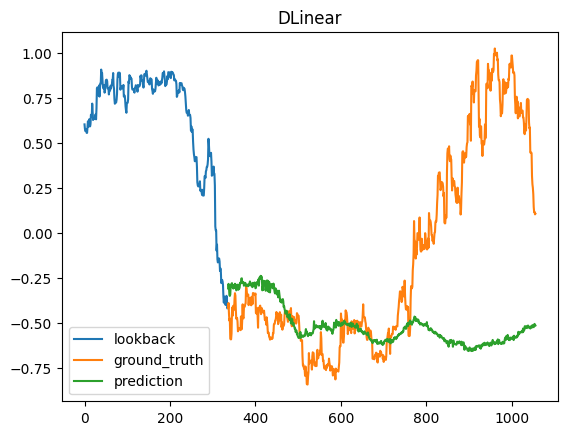

In [141]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ExchangeRate/exchange_rate.csv
train steps: 4256
val steps: 798
test steps: 41
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/ExchangeRate/w336h1s720/29a95393608a0c8fccd151e854bc89ff/run_checkpoint.pth


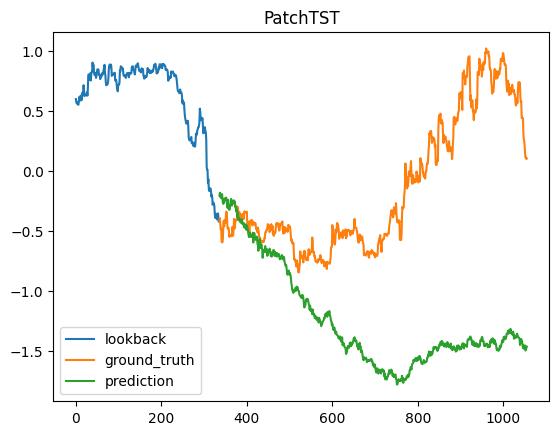

In [142]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=336, pred_len=720, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/ExchangeRate/exchange_rate.csv
train steps: 4256
val steps: 798
test steps: 41
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/ExchangeRate/w336h1s720/b5d8417215bf20d2f9e7ac6b5f0691fd/run_checkpoint.pth


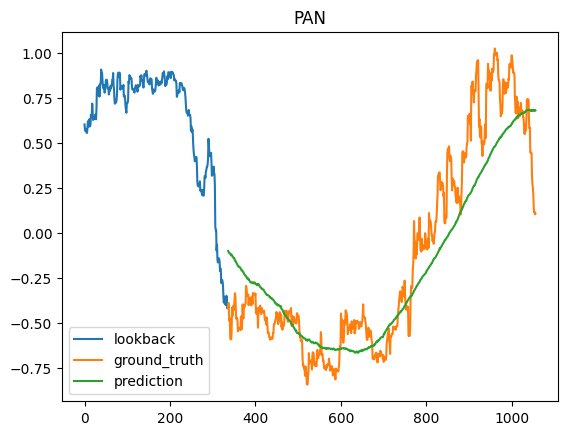

In [143]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=336, horizon=1, pred_len=720, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.6 Traffic

In [144]:
dataset= "Traffic"

In [203]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 5000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 600

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Traffic/w336h1s96/d32f10e031aeab767053bd5dbd984404/run_checkpoint.pth


### DLinear

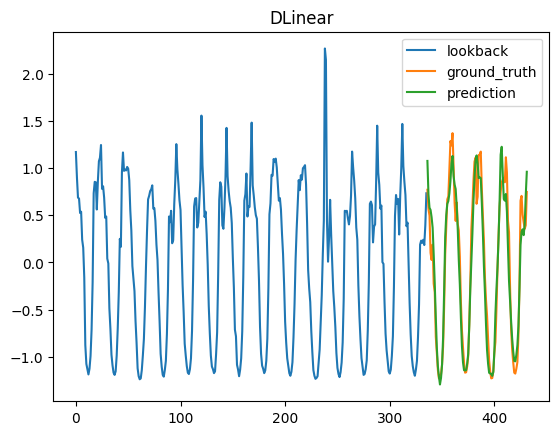

In [204]:
# plot x and y
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic


train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/Traffic/w336h1s96/71e522084853d915761042367a057330/run_checkpoint.pth


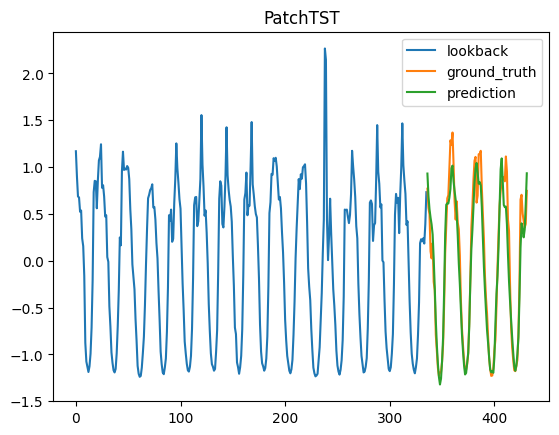

In [205]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, batch_size=16, patch_len=64, stride=48, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
tensor([128, 204, 282, 358, 436, 512], dtype=torch.int32)
self.t_index [191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/Traffic/w336h1s96/9d50049aec59484582f3104e13addf53/run_checkpoint.pth


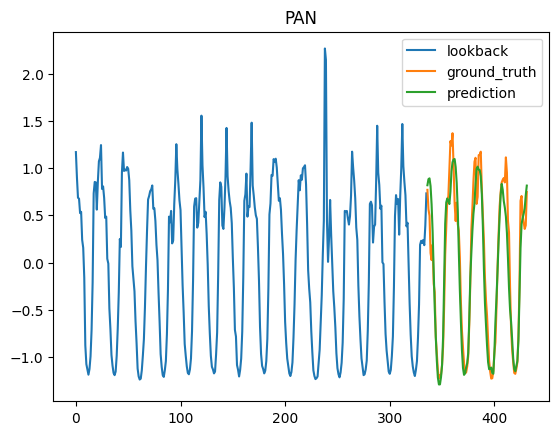

In [206]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, patch_len=192, stride=48, windows=336, horizon=1, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.7 Electricity

In [207]:
dataset= "Electricity"

In [223]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 6000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 200
# v = 200

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Electricity/w336h1s96/170bd6ba2dd7df8fb35dff1e89599ccb/run_checkpoint.pth


### Dlinear

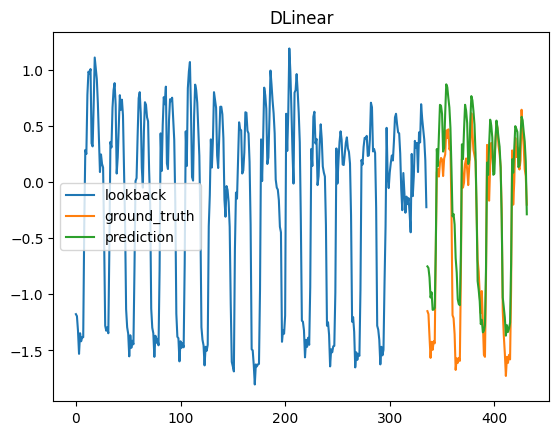

In [224]:
# plot x and y
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('DLinear')
plt.legend()

### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv


train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/PatchTST/Electricity/w336h1s96/a0c81a547920c011d5b2fe62cb46c046/run_checkpoint.pth


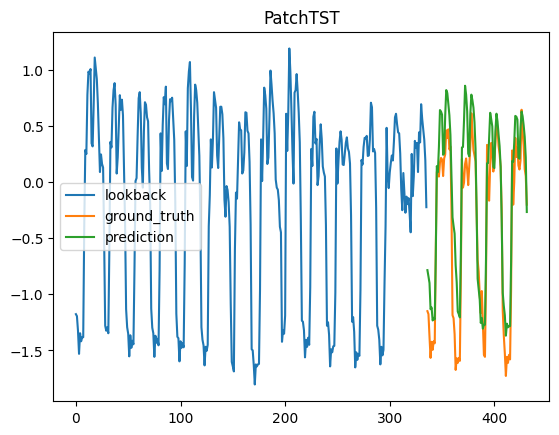

In [225]:
from torch_timeseries.experiments import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, batch_size=32, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
tensor([128, 256, 384, 512], dtype=torch.int32)
self.t_index [287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/Electricity/w336h1s96/0189e082242a7a3611c9730ed4e45fbe/run_checkpoint.pth


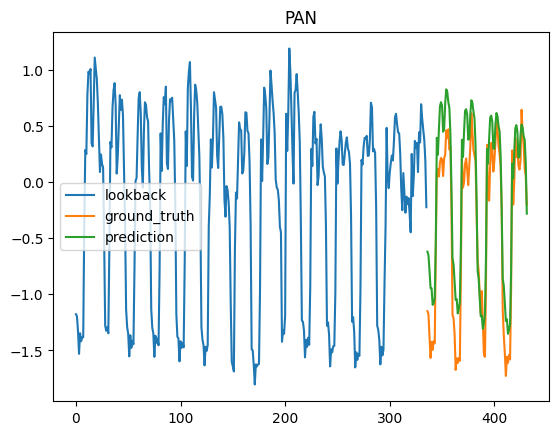

In [226]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, patch_len=288, stride=48, windows=336, horizon=1, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.8 PEMS04

In [63]:
dataset= "PEMS04"

from src.experiments.shortterm import DLinearForecast

exp = DLinearForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable
i = 30
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 0

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

train steps: 11787
val steps: 3387
test steps: 1689
resuming from /notebooks/4901_revisit_cdtran/results/runs/DLinear/PEMS04/w96h1s12/fcb6633aaf48839d8534c87f66e765b9/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

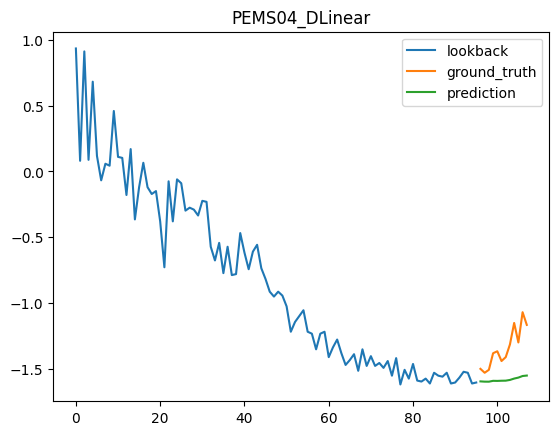

### DLinear

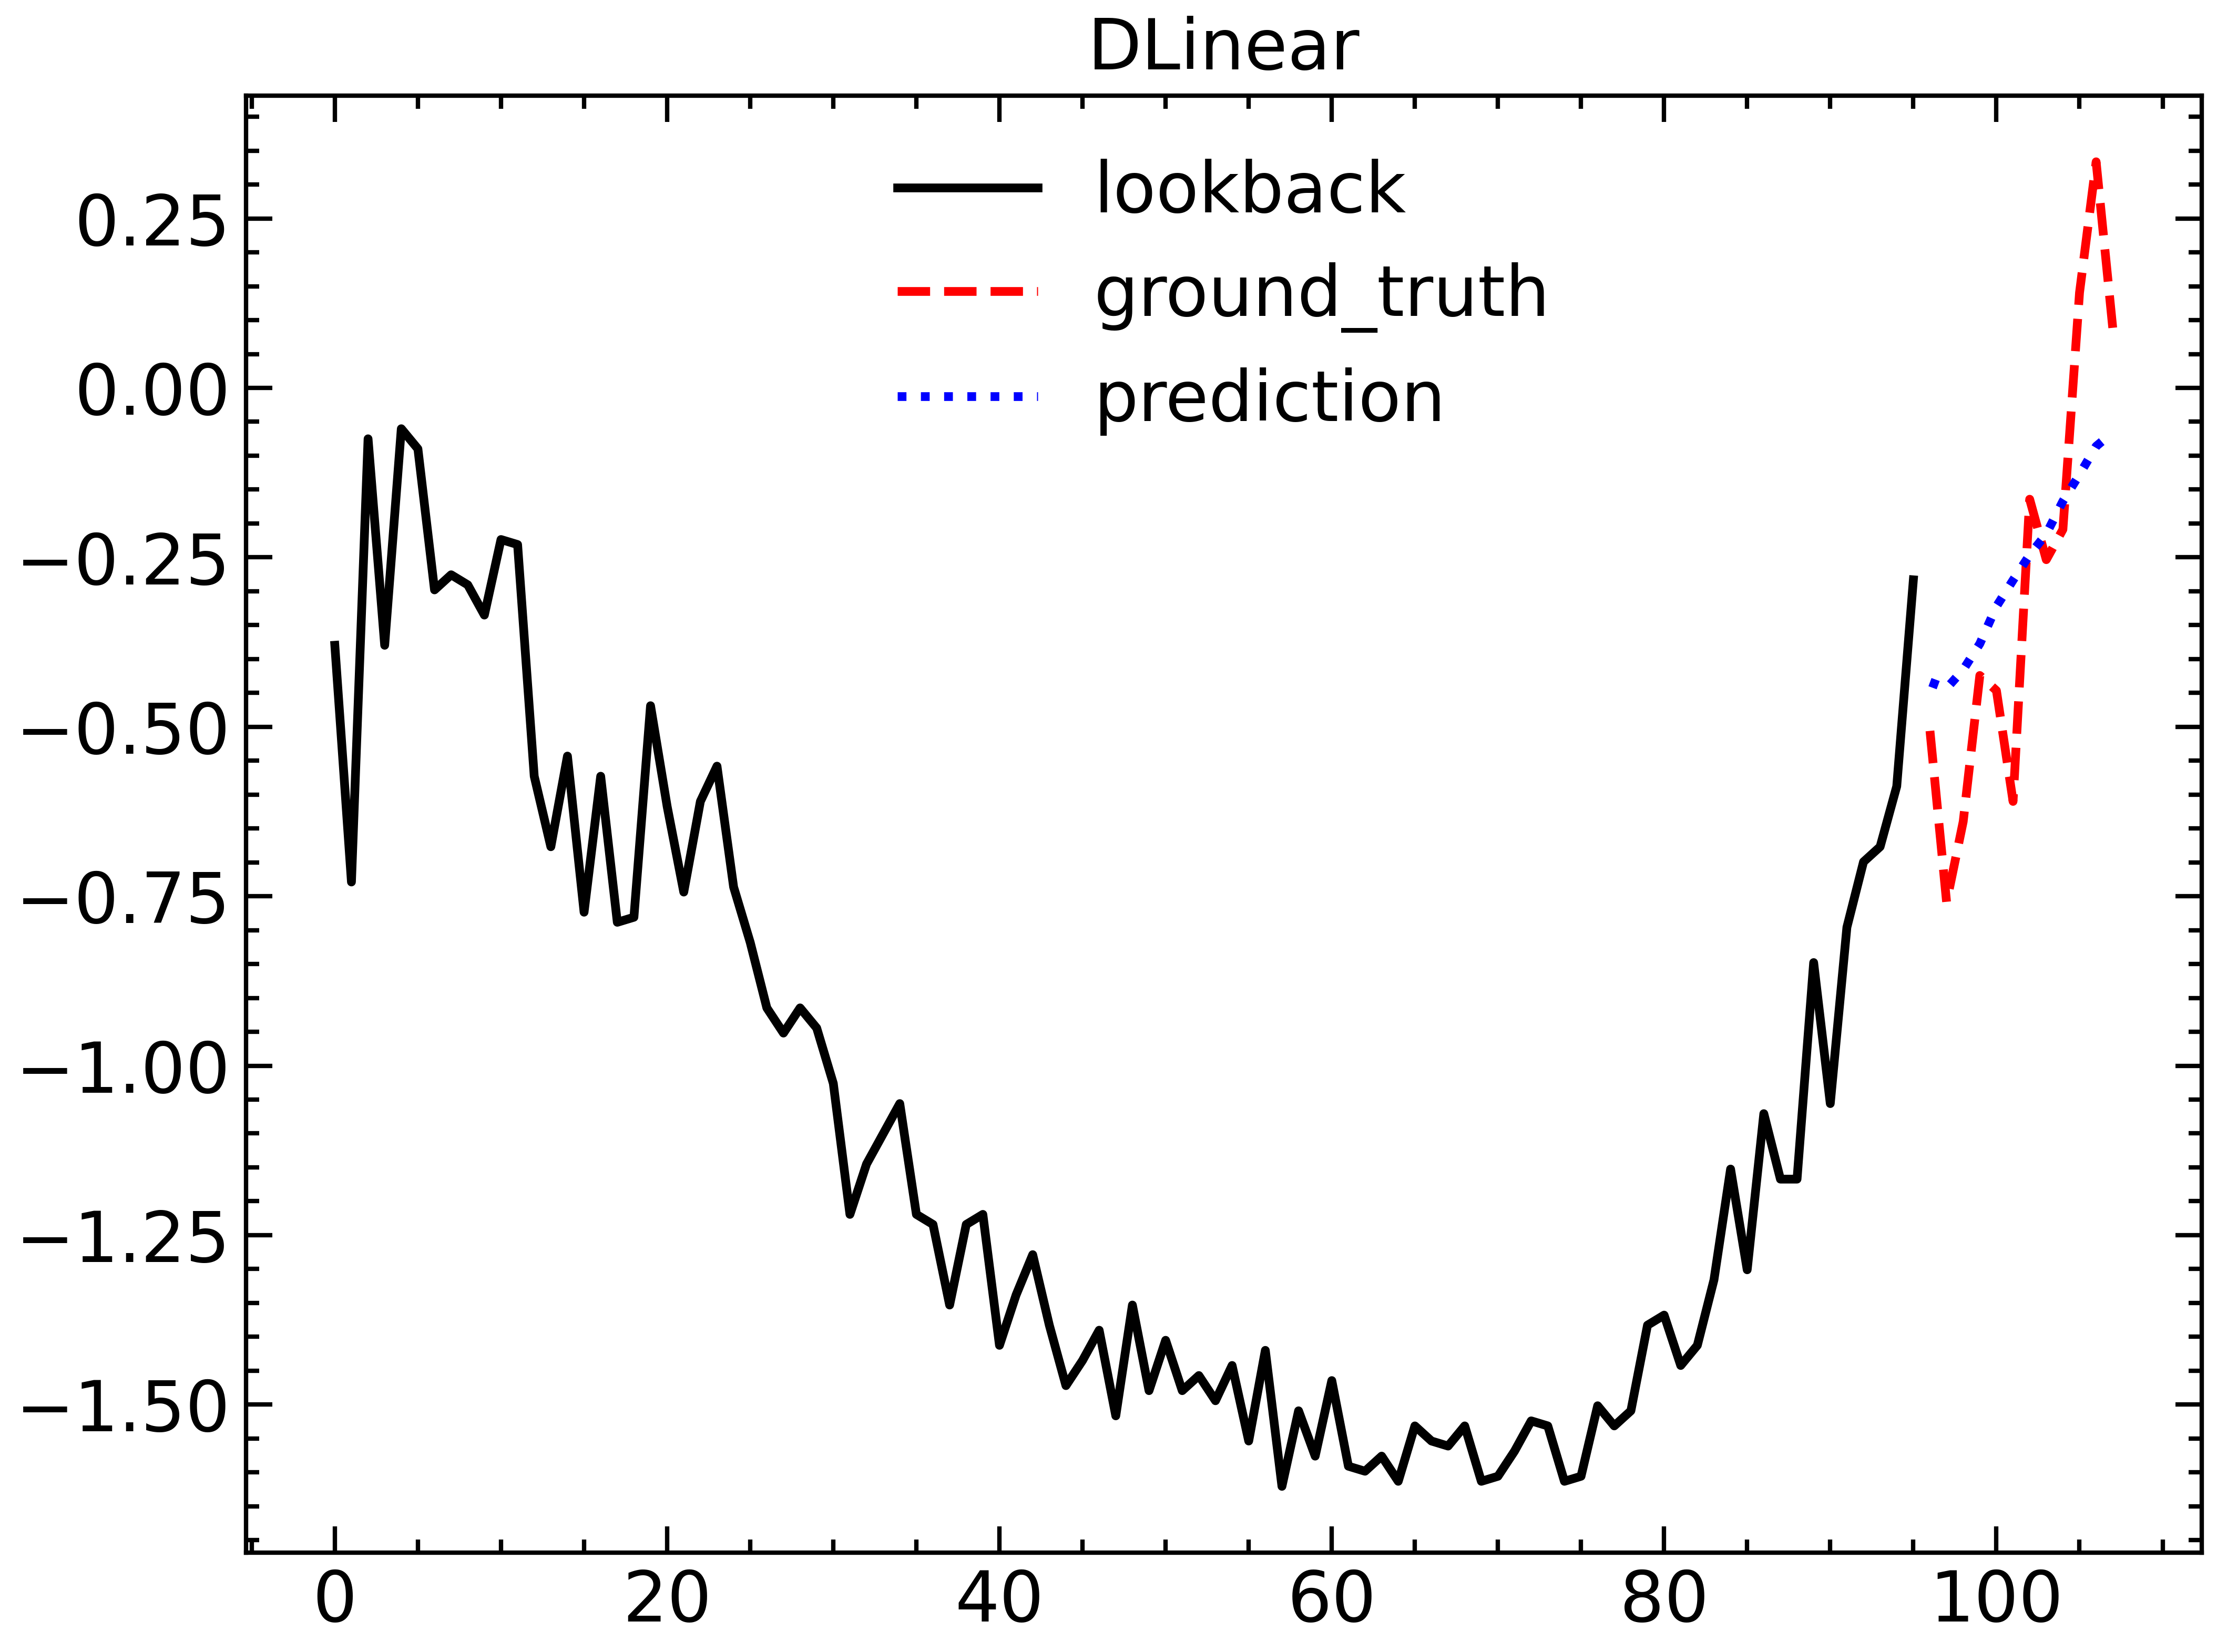

In [64]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title(f'DLinear')
plt.legend()

### PatchTST

train steps: 11787
val steps: 3387
test steps: 1689
resuming from /notebooks/4901_revisit_cdtran/results/runs/PatchTST/PEMS04/w96h1s12/8a996de85ddc2cf9e00def0314e8c276/run_checkpoint.pth


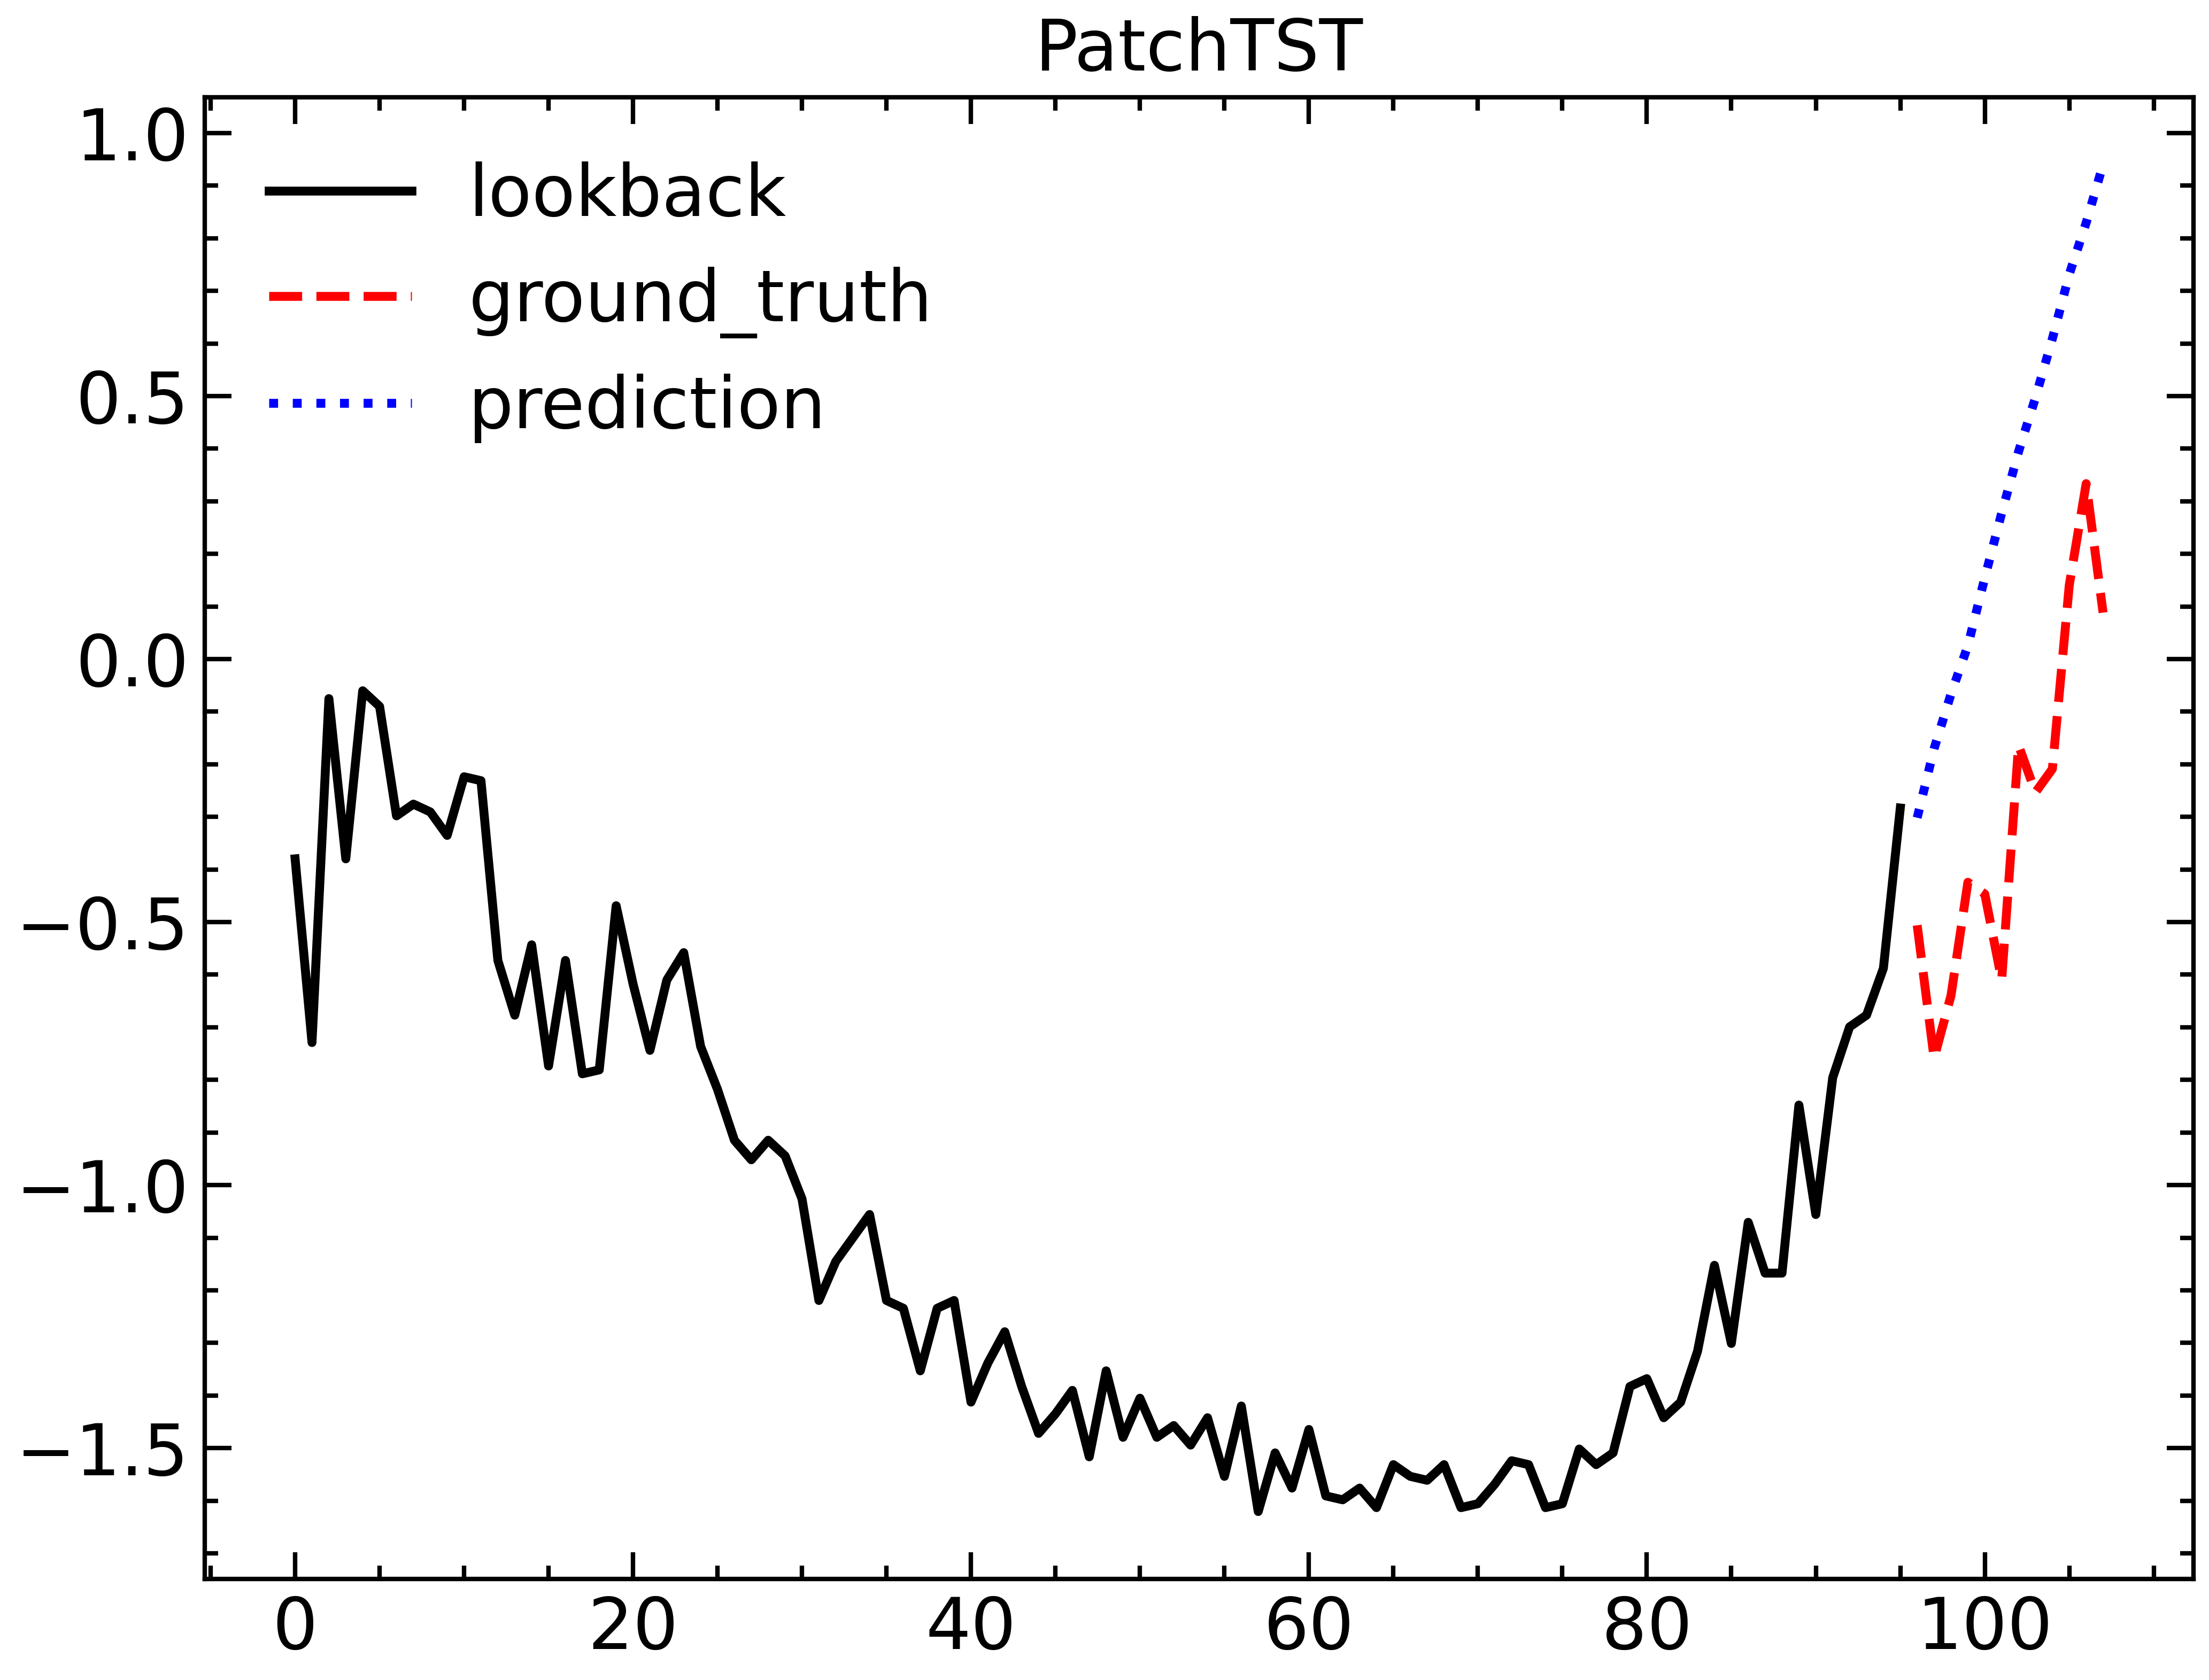

In [65]:
from src.experiments.shortterm import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PatchTST')
plt.legend()


### CATS

train steps: 11787
val steps: 3387
test steps: 1689
resuming from /notebooks/4901_revisit_cdtran/results/runs/CATS/PEMS04/w96h1s12/3f7a836c8eefb208e285d89da57796e0/run_checkpoint.pth


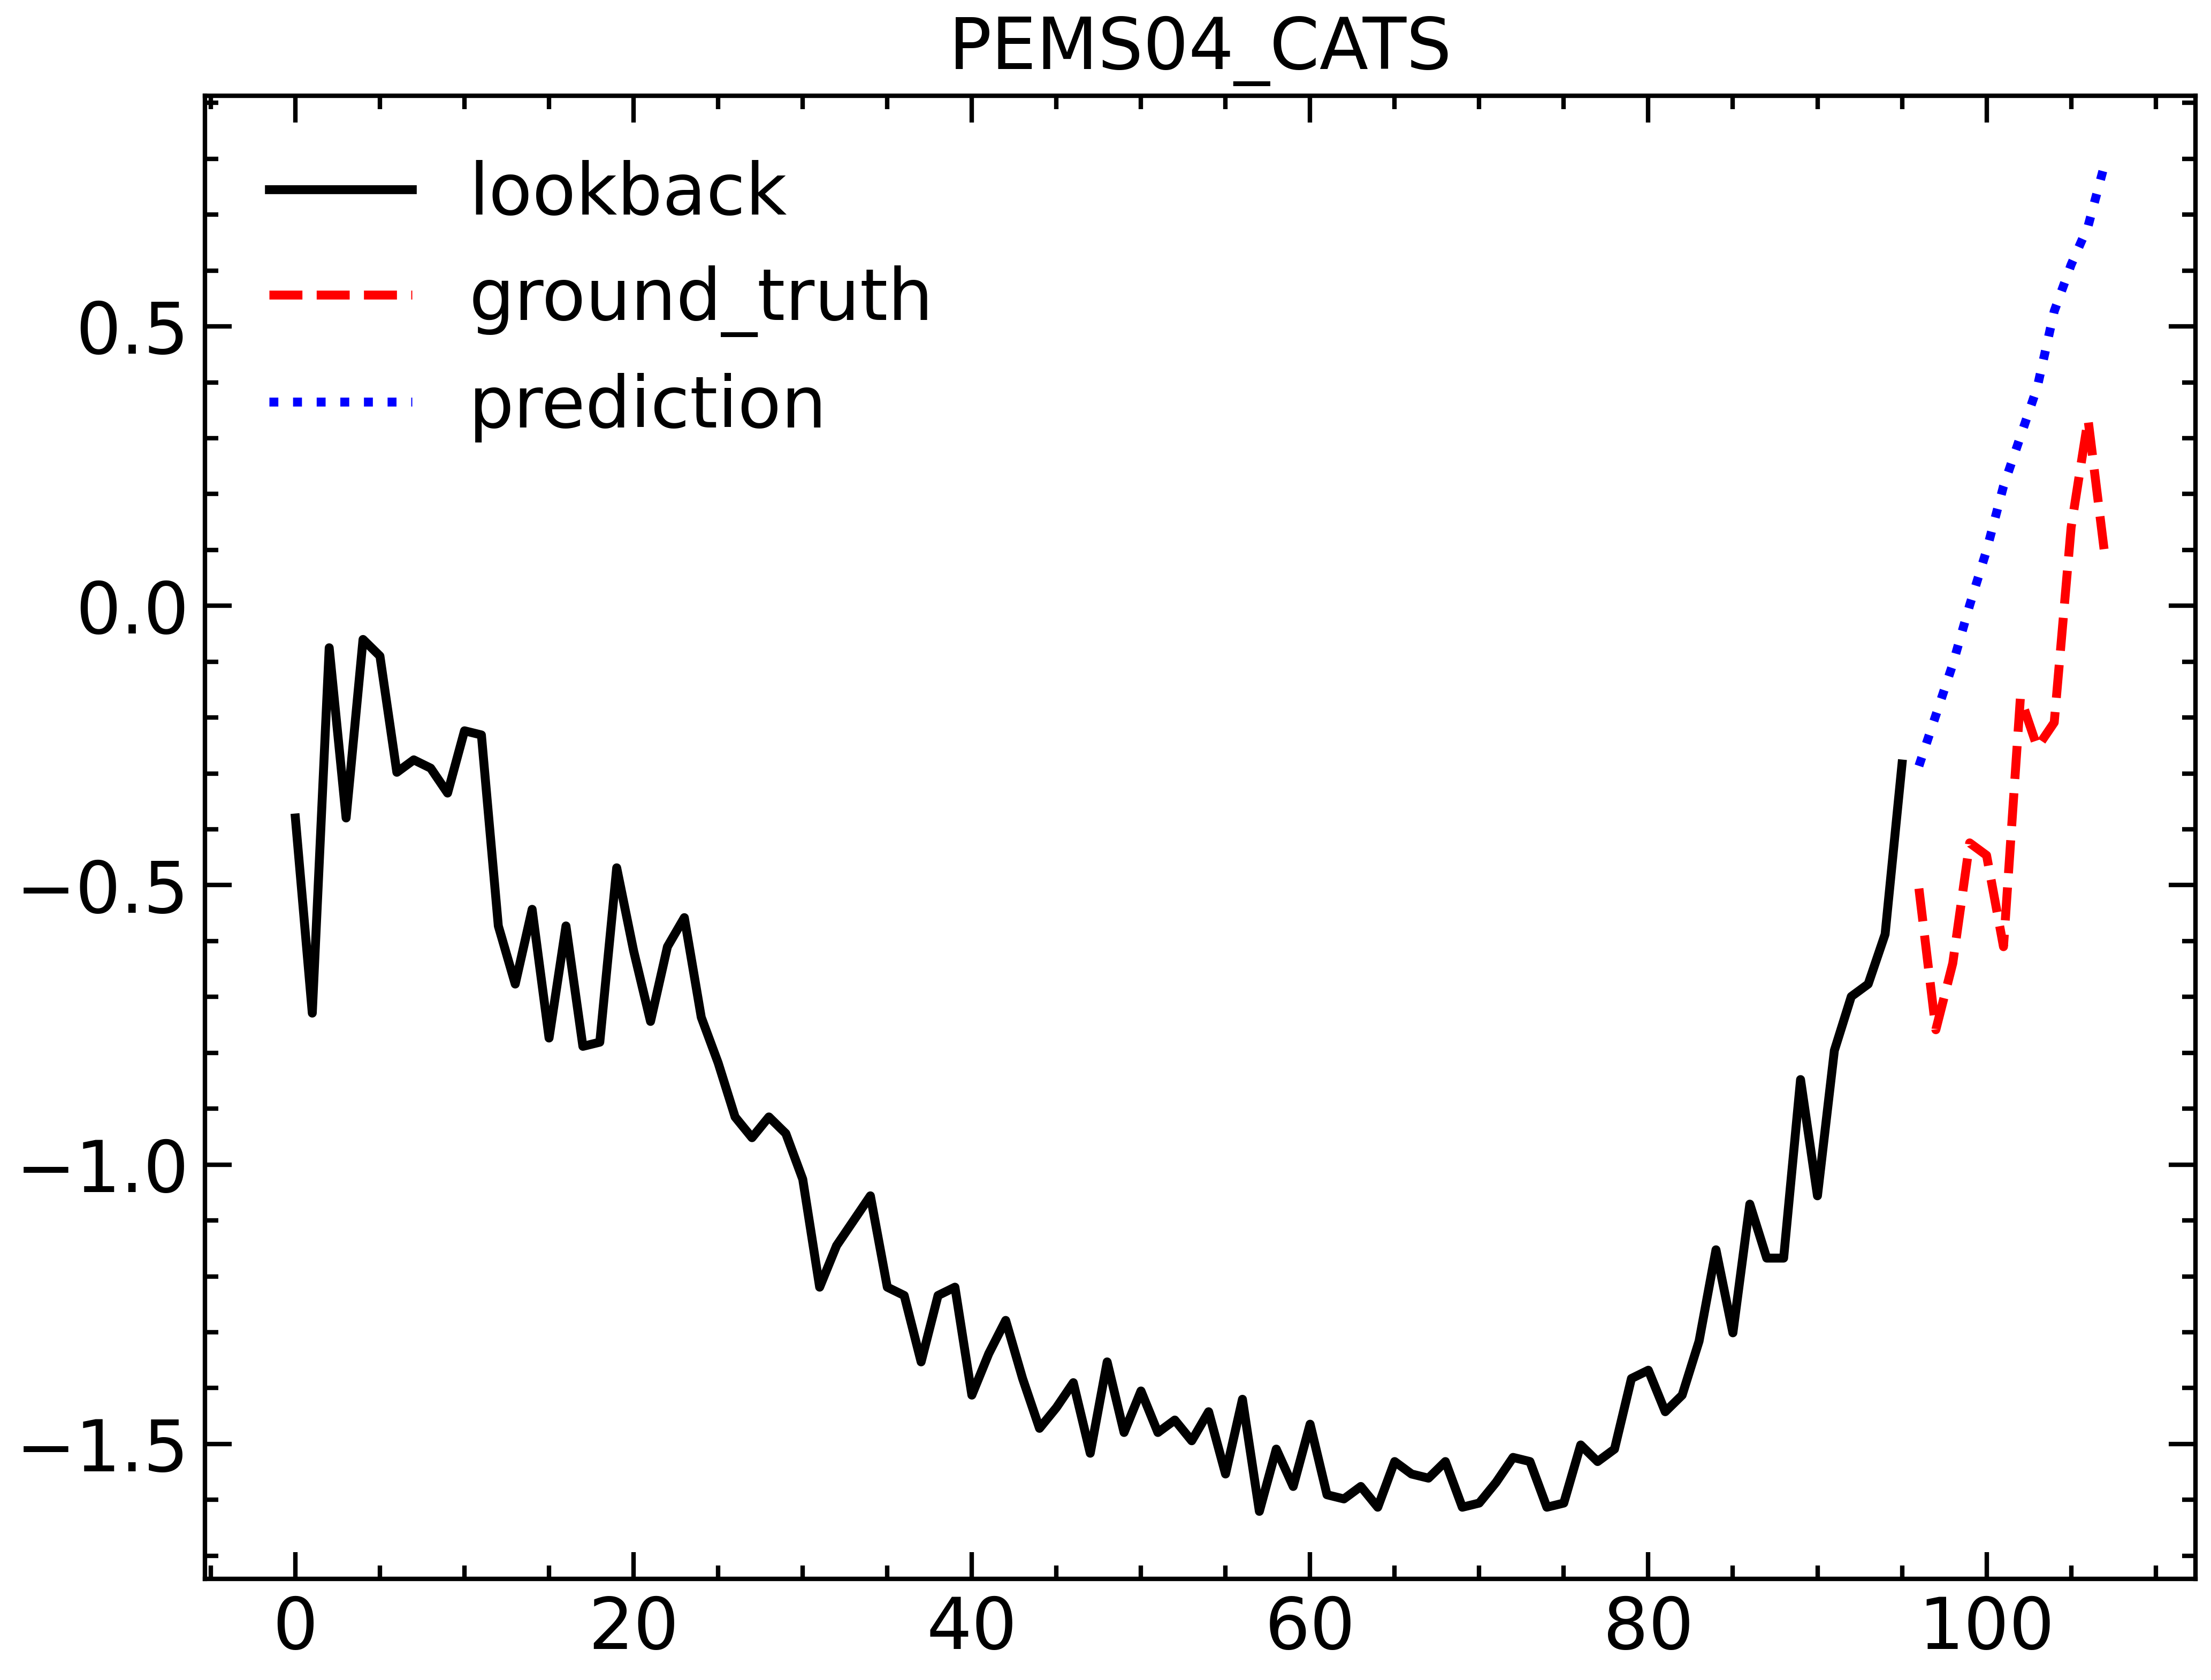

In [66]:
from src.experiments.shortterm import CATSForecast

exp = CATSForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title(f'{dataset}_CATS')
plt.legend()


### PAN

train steps: 11787
val steps: 3387
test steps: 1689
tensor([128, 320, 512], dtype=torch.int32)
self.t_index [95, 143]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/PEMS04/w96h1s12/eabffba5fc558a7ee339bdd7fe3455e4/run_checkpoint.pth


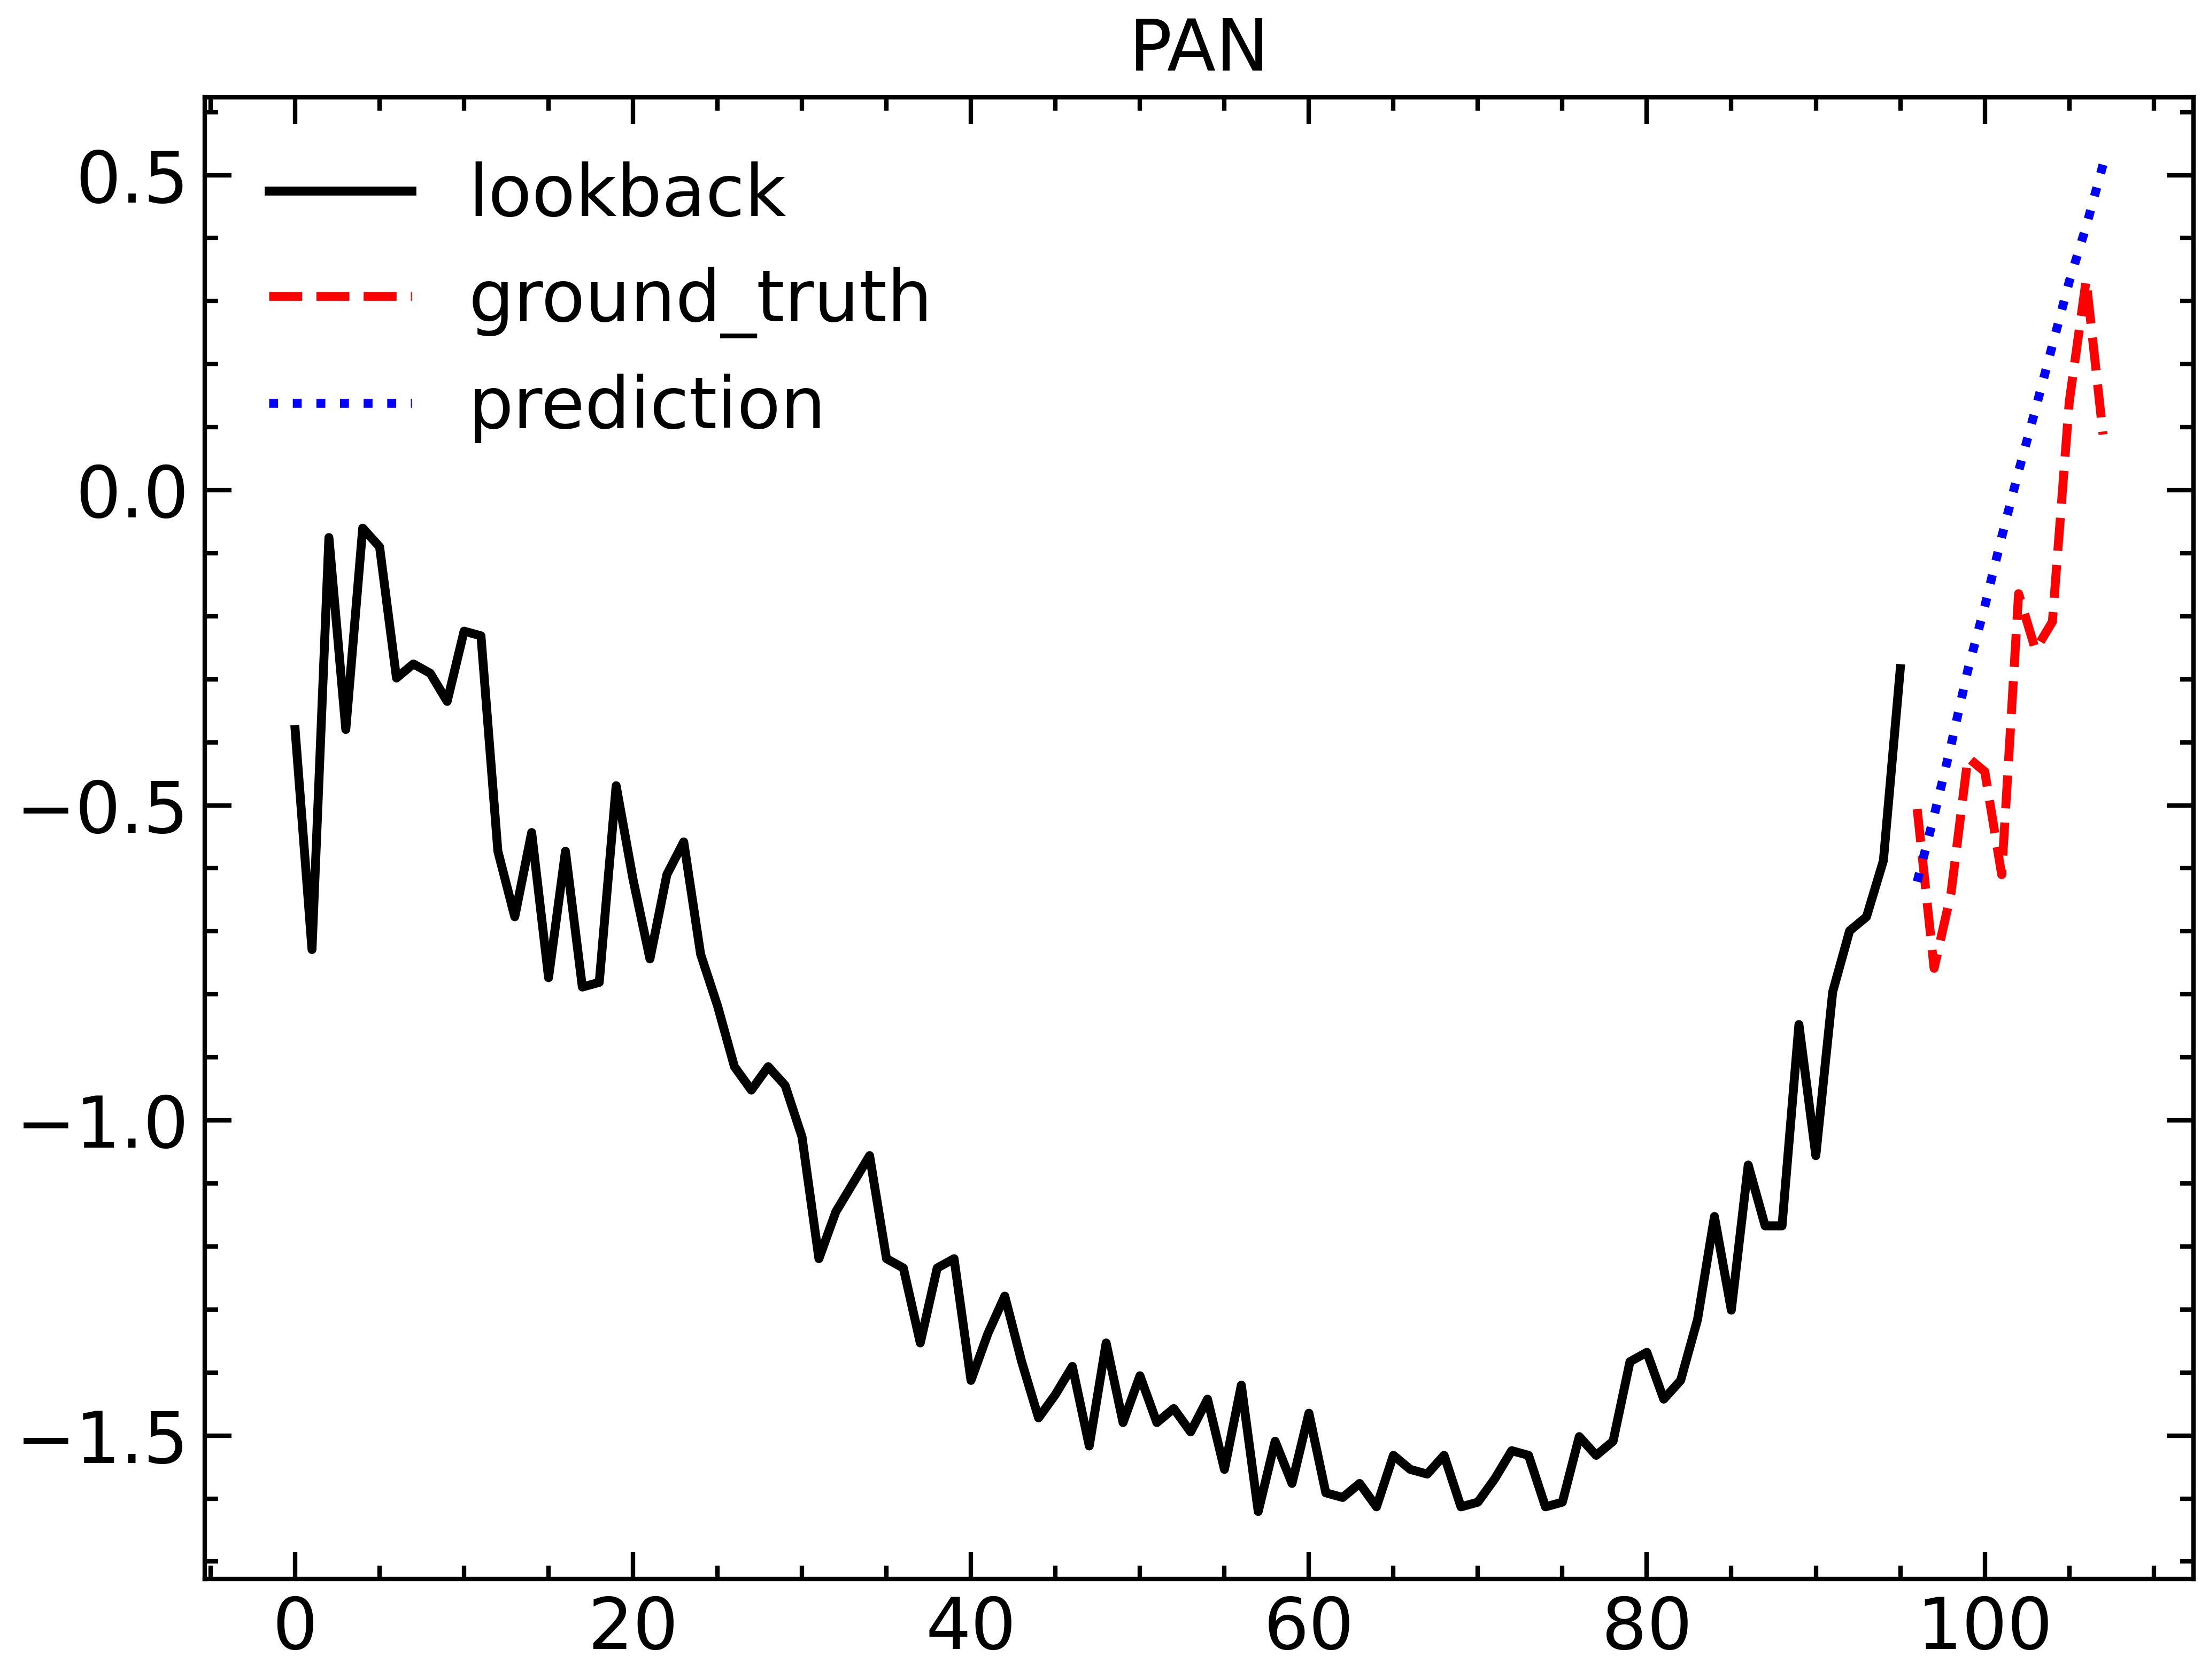

In [67]:
from src.experiments.shortterm import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title('PAN')
plt.legend()


## 1.9 PEMS08

In [26]:
dataset= "PEMS08"

from src.experiments.shortterm import DLinearForecast

exp = DLinearForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 100
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 0

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/DLinear/PEMS08/w96h1s12/25837afd8aee99f27fc32ffaa90f6b02/run_checkpoint.pth


### DLinear

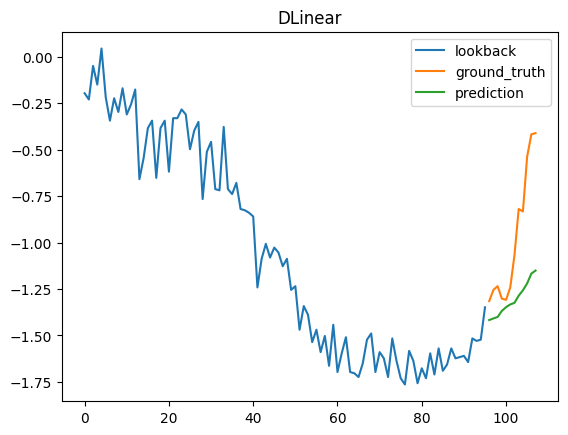

In [27]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title(f'DLinear')
plt.legend()

### Informer

### PatchTST

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/PatchTST/PEMS08/w96h1s12/9077a18c4bc65c10bf660a47b525ecd5/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

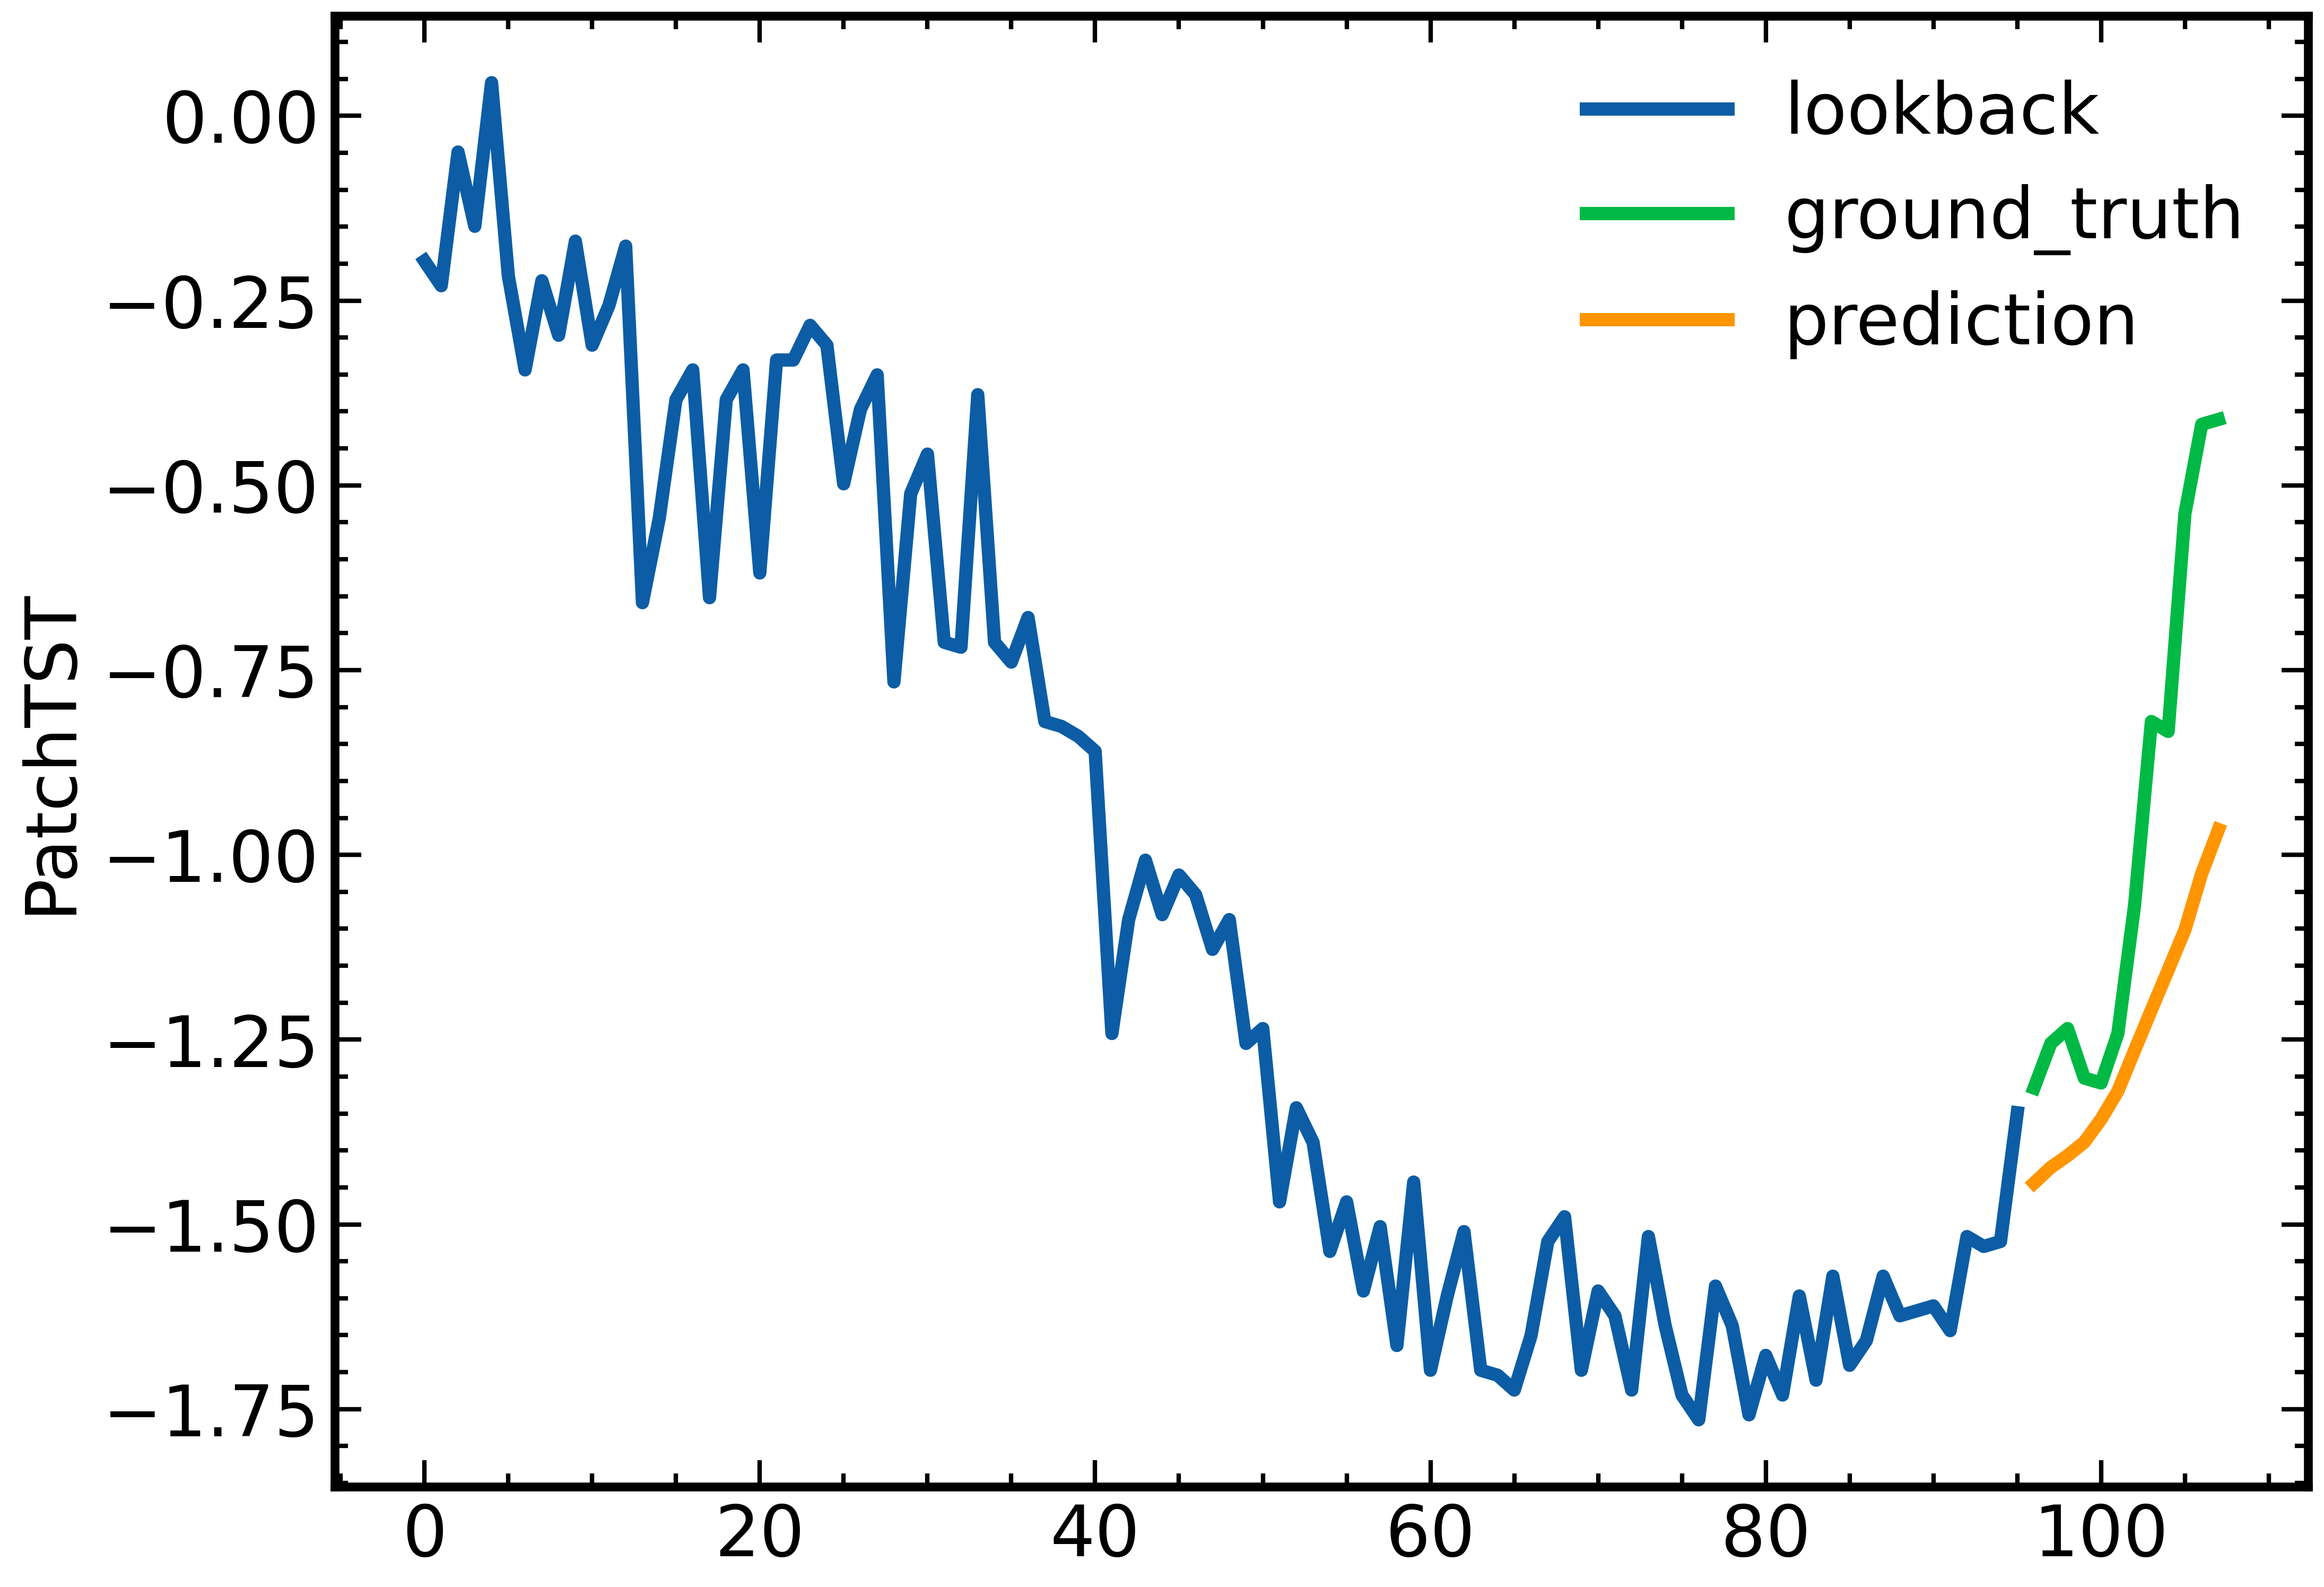

In [49]:
from src.experiments.shortterm import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)

with plt.style.context(['science', 'notebook']):

    fig, ax = plt.subplots()

    # 设置边框粗度
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # 设置边框粗度为2

    plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
    ax.plot(x_ticks, plot_x, label='lookback', linewidth=3)
    ax.plot(y_ticks, plot_y, label='ground_truth', linewidth=3)
    ax.plot(y_ticks, plot_pred_y, label='prediction', linewidth=3)

plt.ylabel('PatchTST')
plt.legend()


### Crossformer

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/Crossformer/PEMS08/w96h1s12/18aa07e753aeb2c290d39c71cf0a84d7/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

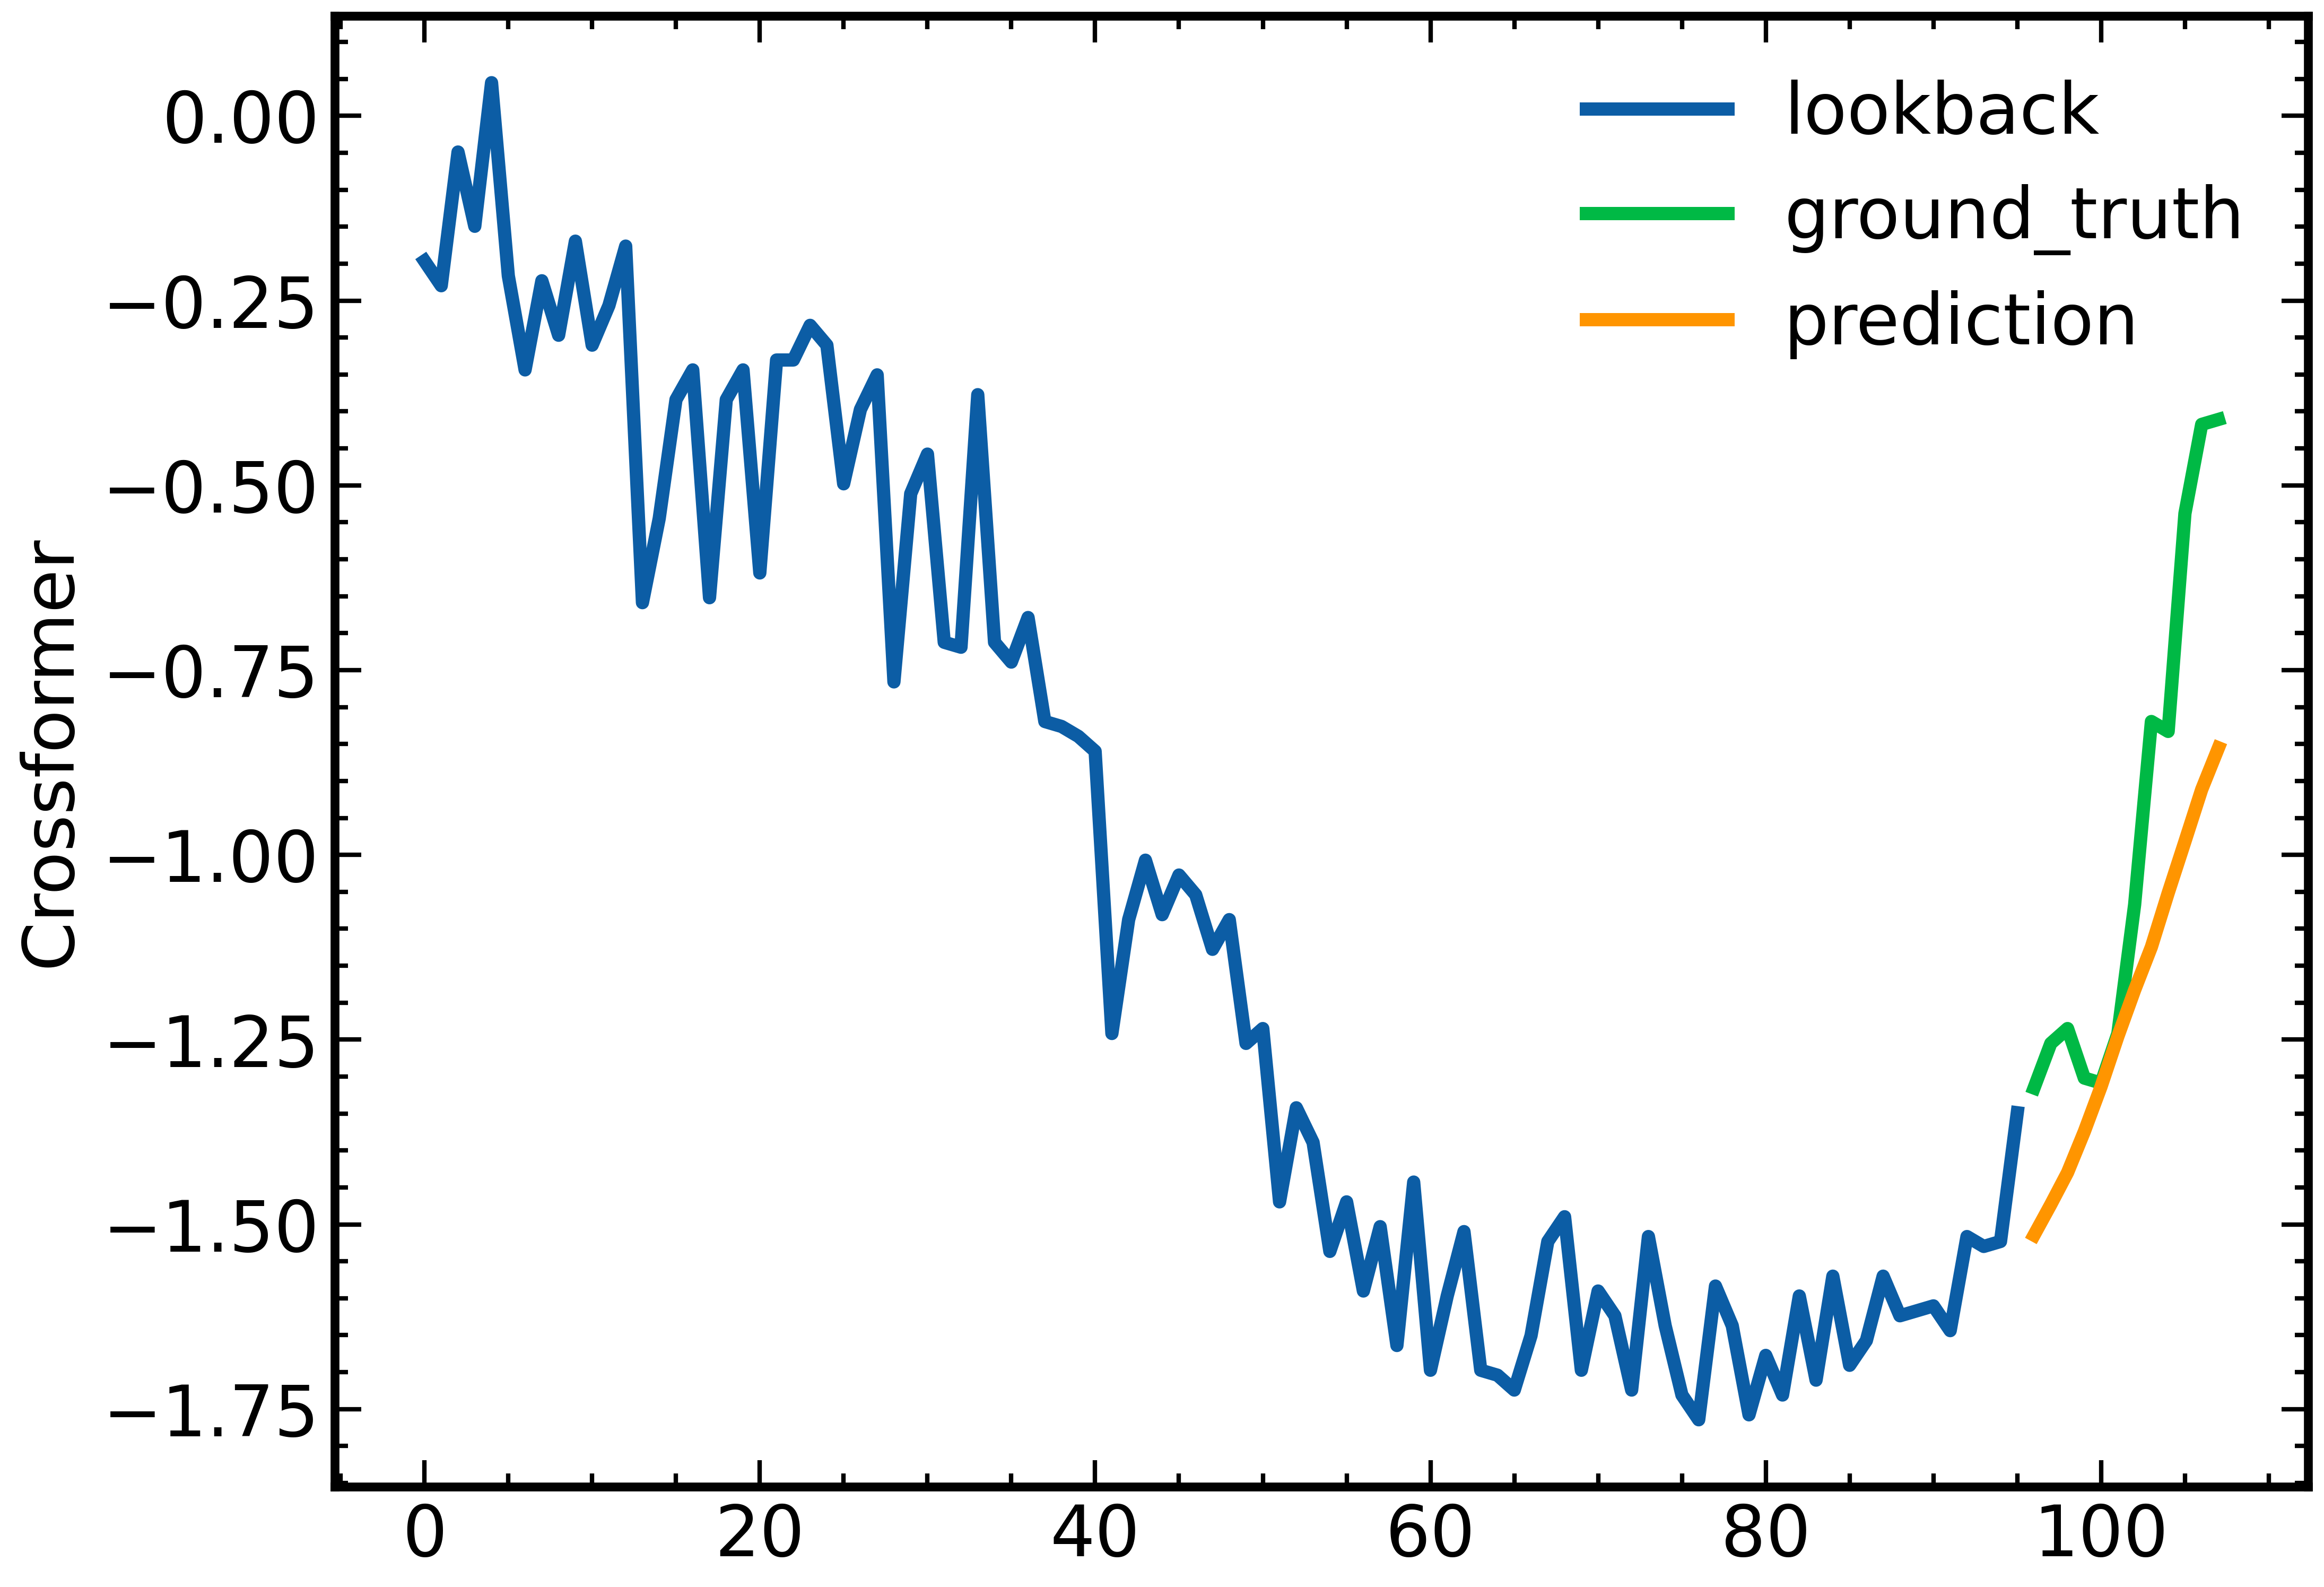

In [62]:
from src.experiments.shortterm import CrossformerForecast

exp = CrossformerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Crossformer')

plt.ylabel('Crossformer')
plt.legend()


### iTransformer

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/iTransformer/PEMS08/w96h1s12/c4e0d4f116da8cb65bf89ac0d949f2ae/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

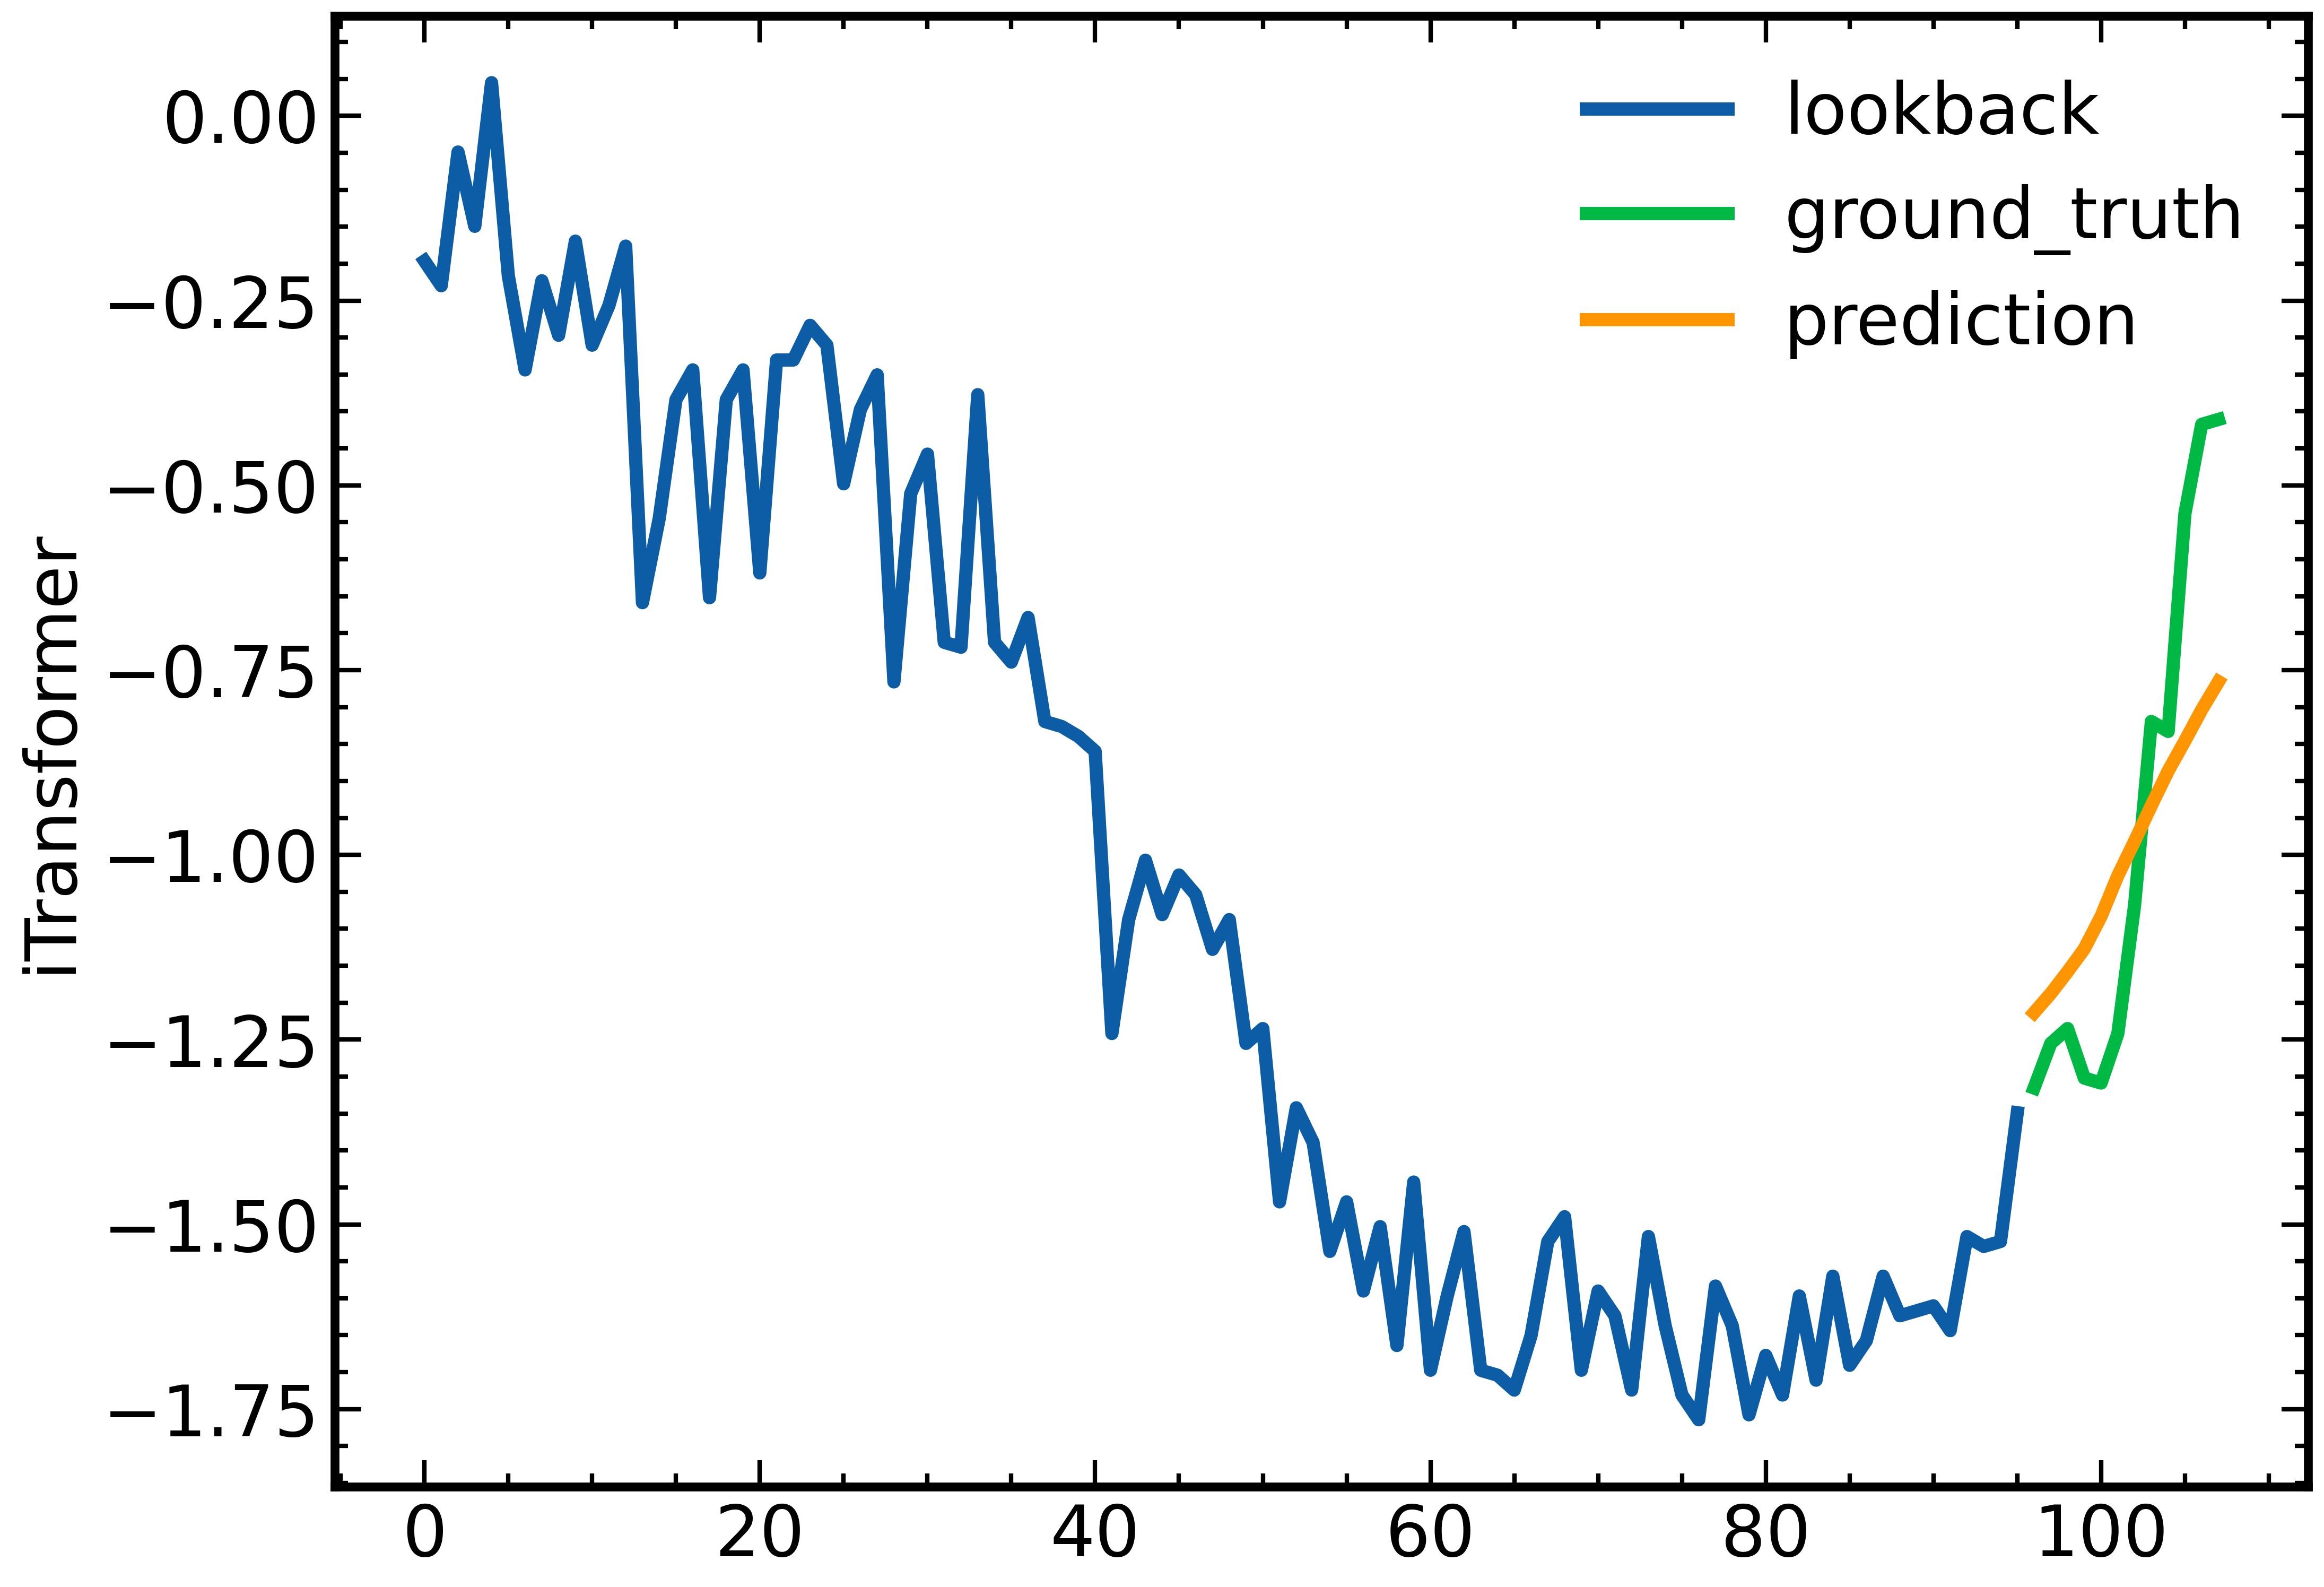

In [61]:
from src.experiments.shortterm import iTransformerForecast

exp = iTransformerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'iTransformer')

plt.ylabel('iTransformer')
plt.legend()


### CATS

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/CATS/PEMS08/w96h1s12/a3e6ba4de41e3ae06e7618b41dcbc3bd/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

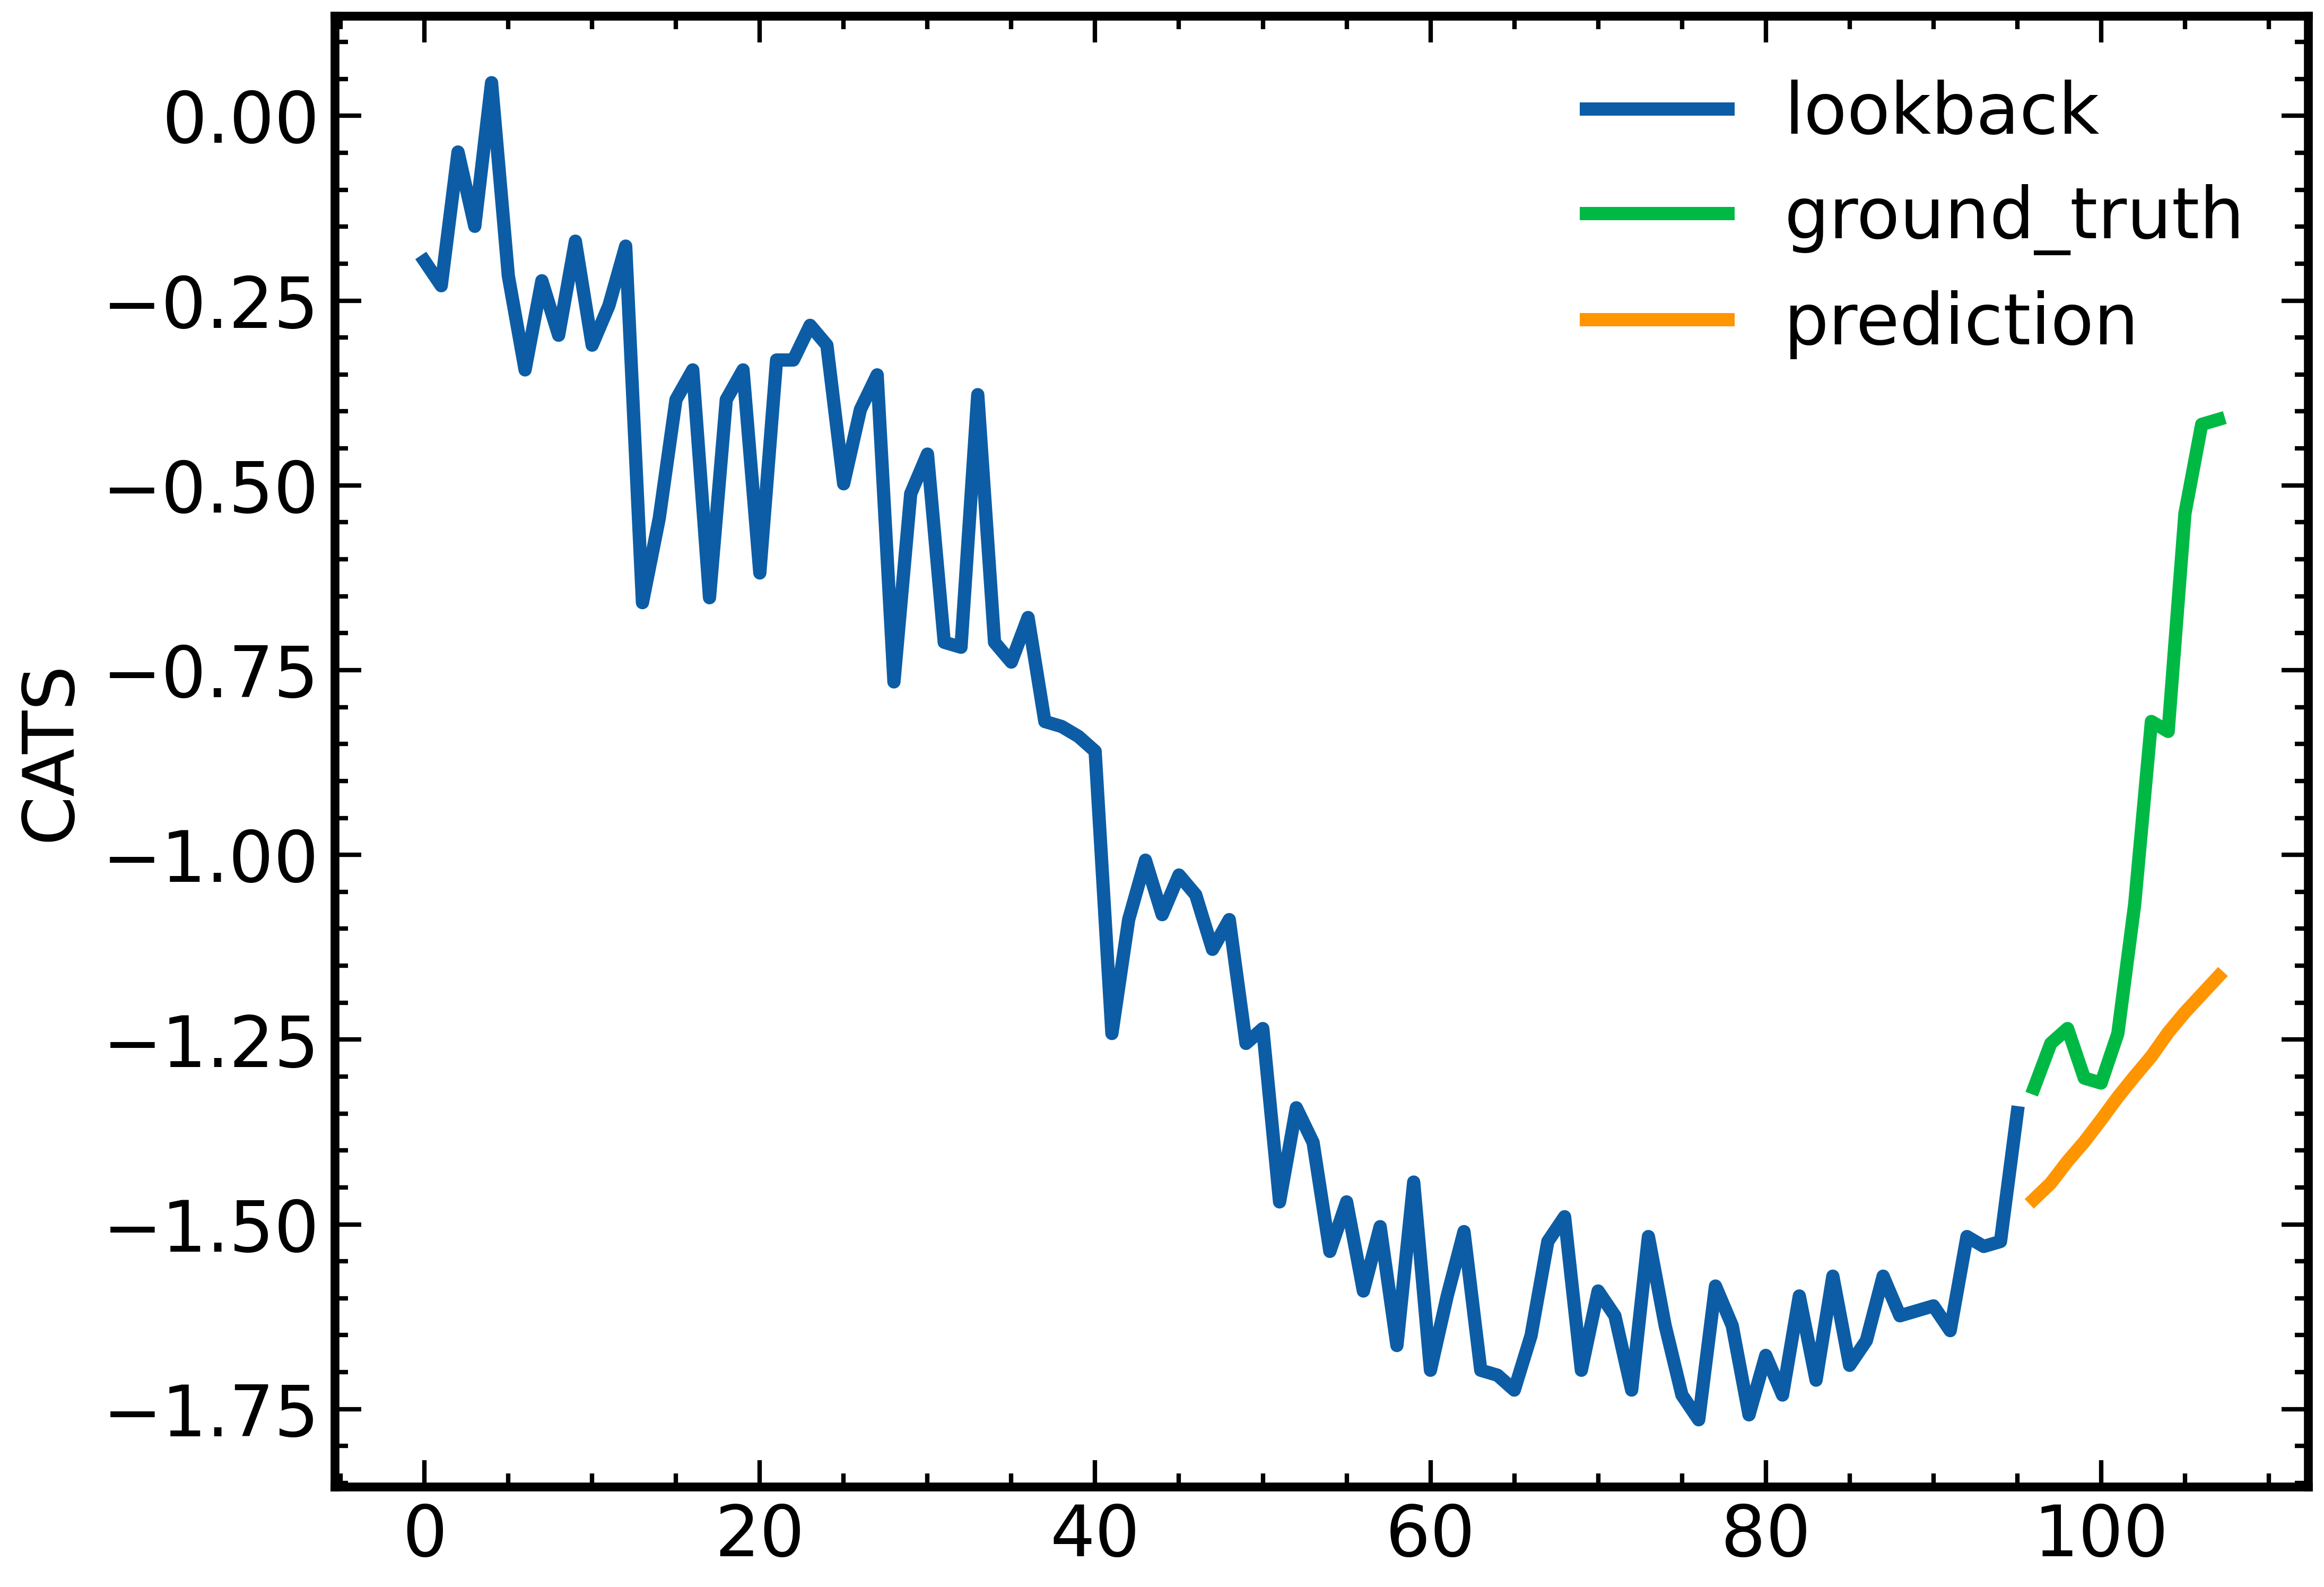

In [60]:
from src.experiments.shortterm import CATSForecast

exp = CATSForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'CATS')

plt.ylabel('CATS')
plt.legend()


### PAN

train steps: 12392
val steps: 3560
test steps: 1775
tensor([128, 320, 512], dtype=torch.int32)
self.t_index [95, 143]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/PEMS08/w96h1s12/7ec2adb9aac84dc398c8970aa78bc172/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

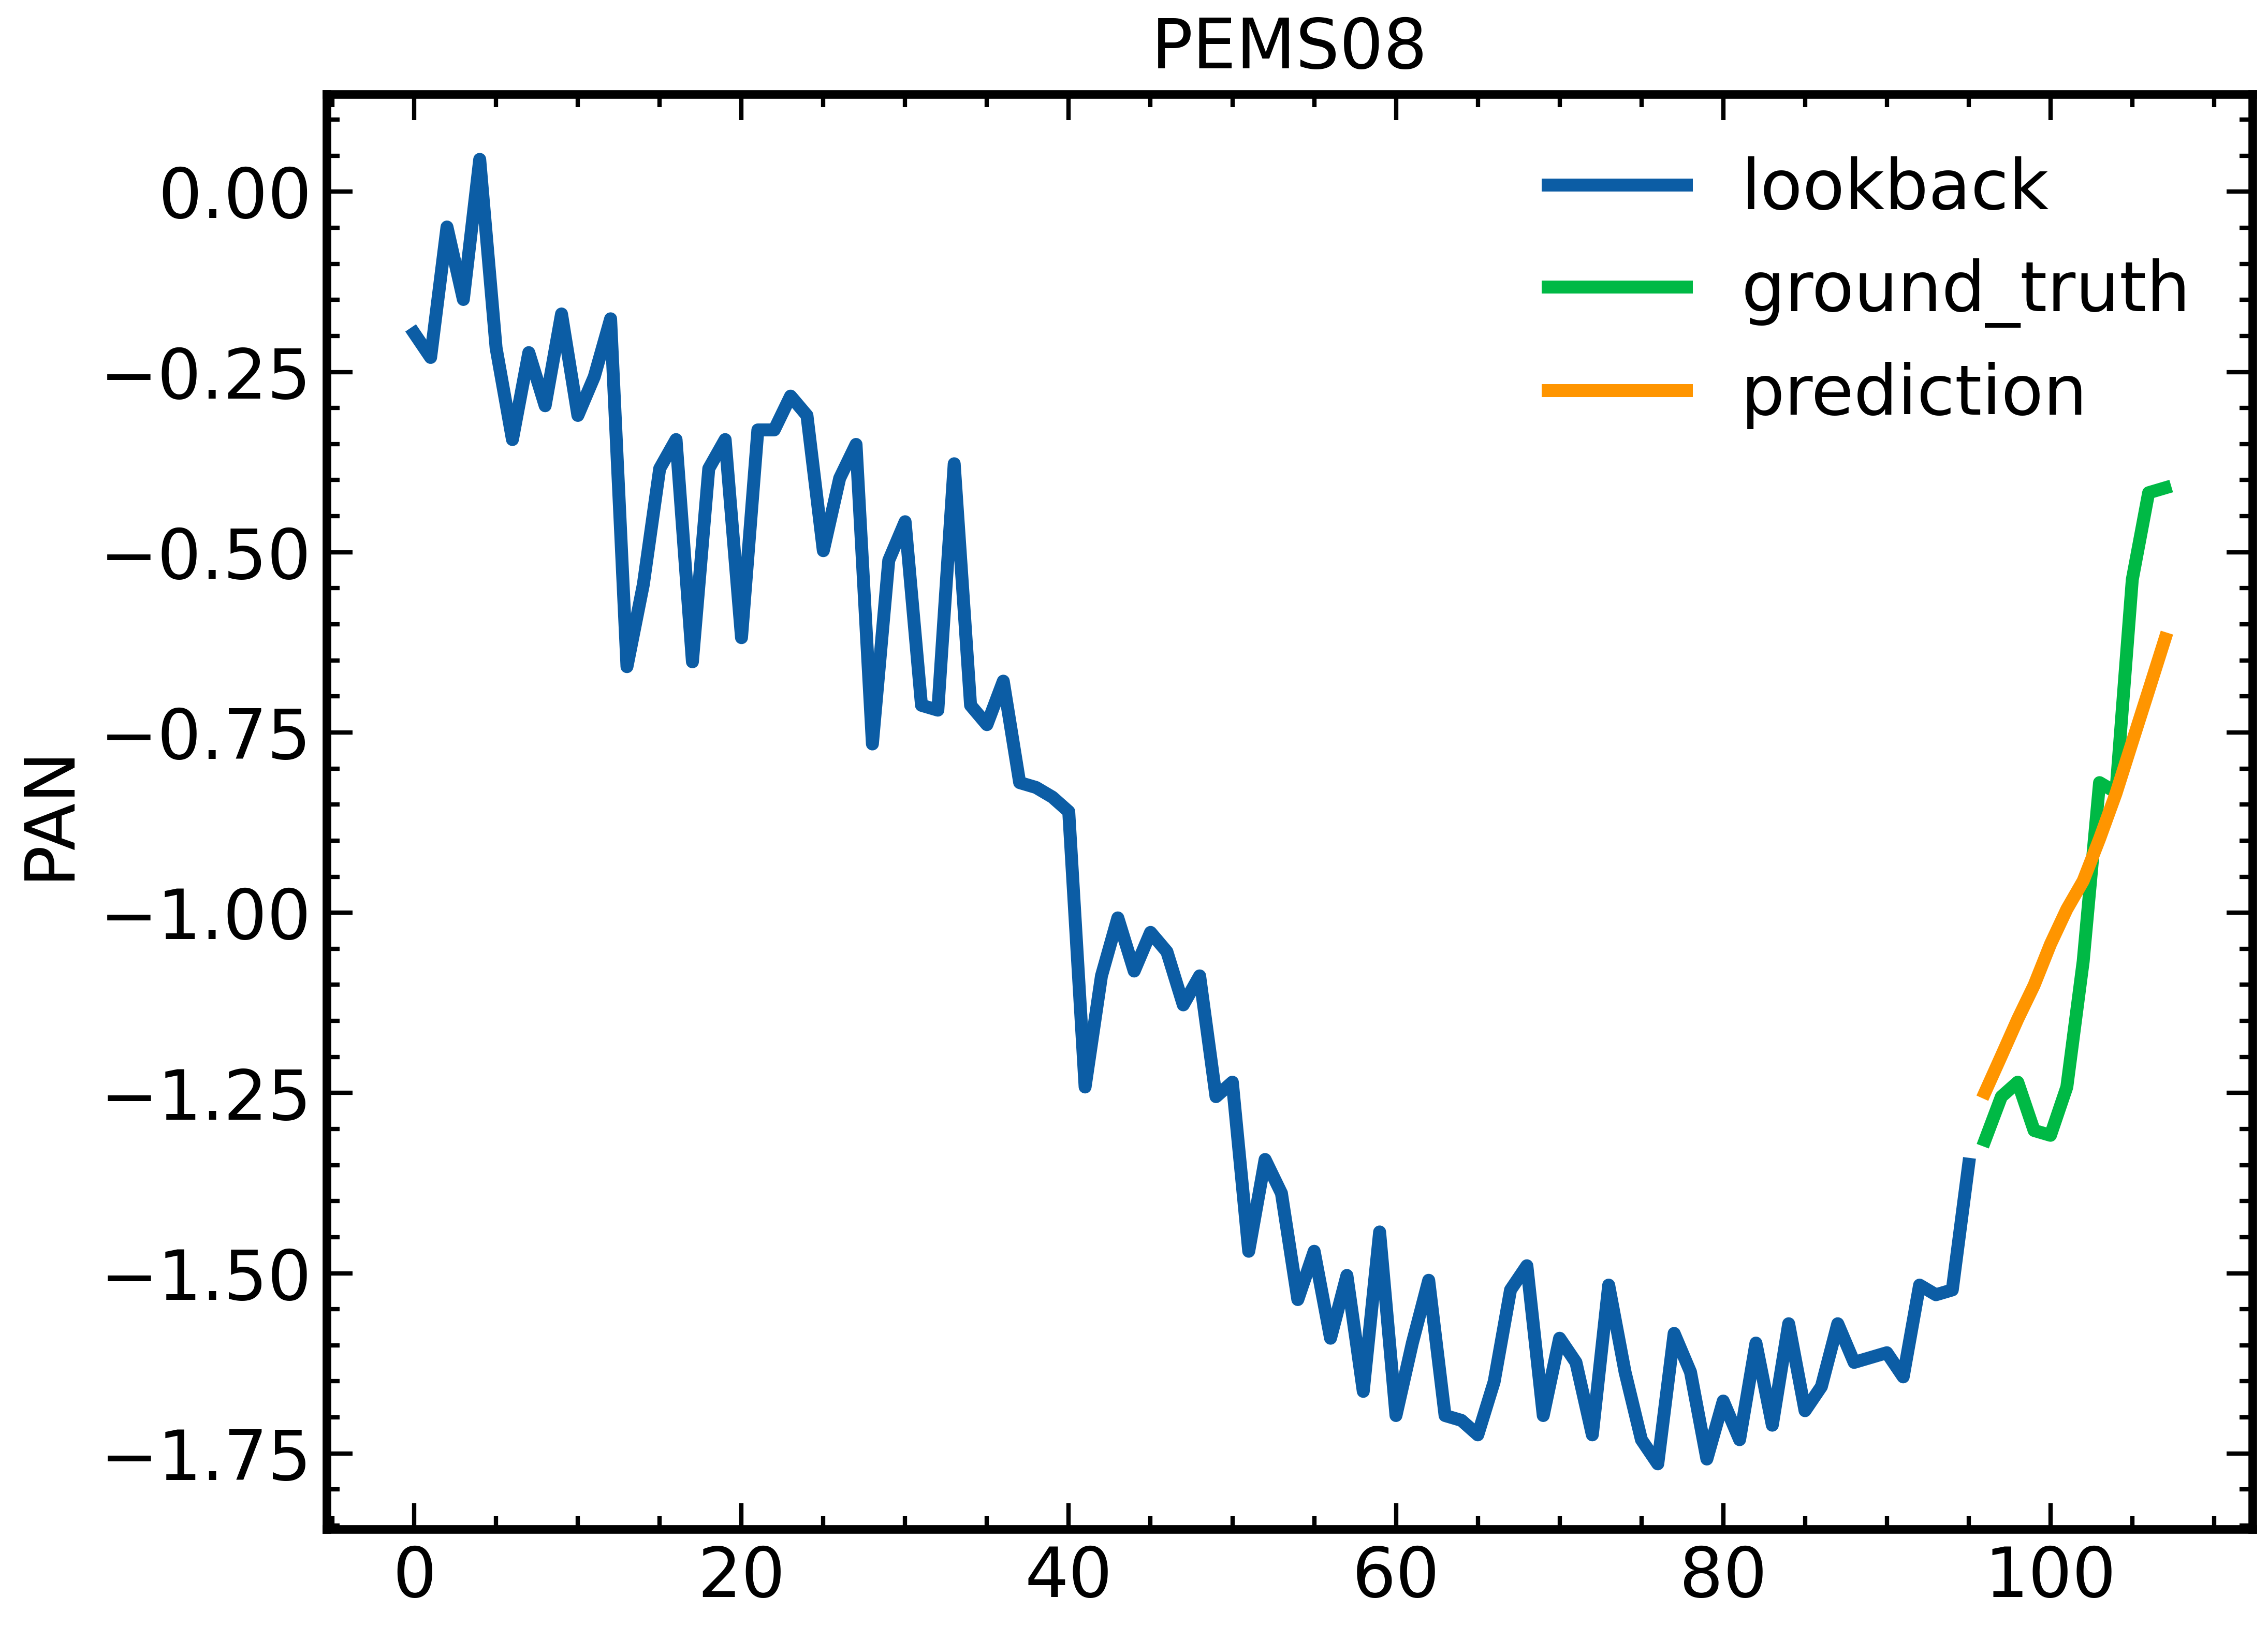

In [56]:
from src.experiments.shortterm import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, 'PEMS08', 'PAN')
# with plt.style.context(['science', 'notebook']):
#     plt.figure()

#     plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
#     plt.plot(x_ticks, plot_x, label='lookback')
#     plt.plot(y_ticks, plot_y, label='ground_truth')
#     plt.plot(y_ticks, plot_pred_y, label='prediction')

# plt.title('PEMS08')
# plt.ylabel('PAN')
# plt.legend()


## 1.10 PEMS07

In [2]:
dataset= "PEMS07"

from src.experiments.shortterm import DLinearForecast

exp = DLinearForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable v=0
i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 500

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

train steps: 19649
val steps: 5633
test steps: 2813


/root/anaconda3/envs/testpyt/lib/python3.8/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/root/anaconda3/envs/testpyt/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


resuming from /notebooks/4901_revisit_cdtran/results/runs/DLinear/PEMS07/w96h1s12/5a648c9e98547d7fbe0a27de6f836f8c/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

### Dlinear

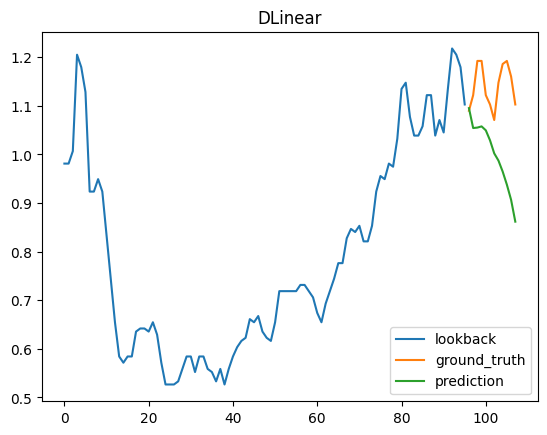

In [3]:
plt.plot(x_ticks, plot_x, label='lookback')
plt.plot(y_ticks, plot_y, label='ground_truth')
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
plt.plot(y_ticks, plot_pred_y, label='prediction')

plt.title(f'DLinear')
plt.legend()

### PatchTST

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/PatchTST/PEMS07/w96h1s12/7b880cdcfbf9f06e14ec3c7790cfcdf0/run_checkpoint.pth


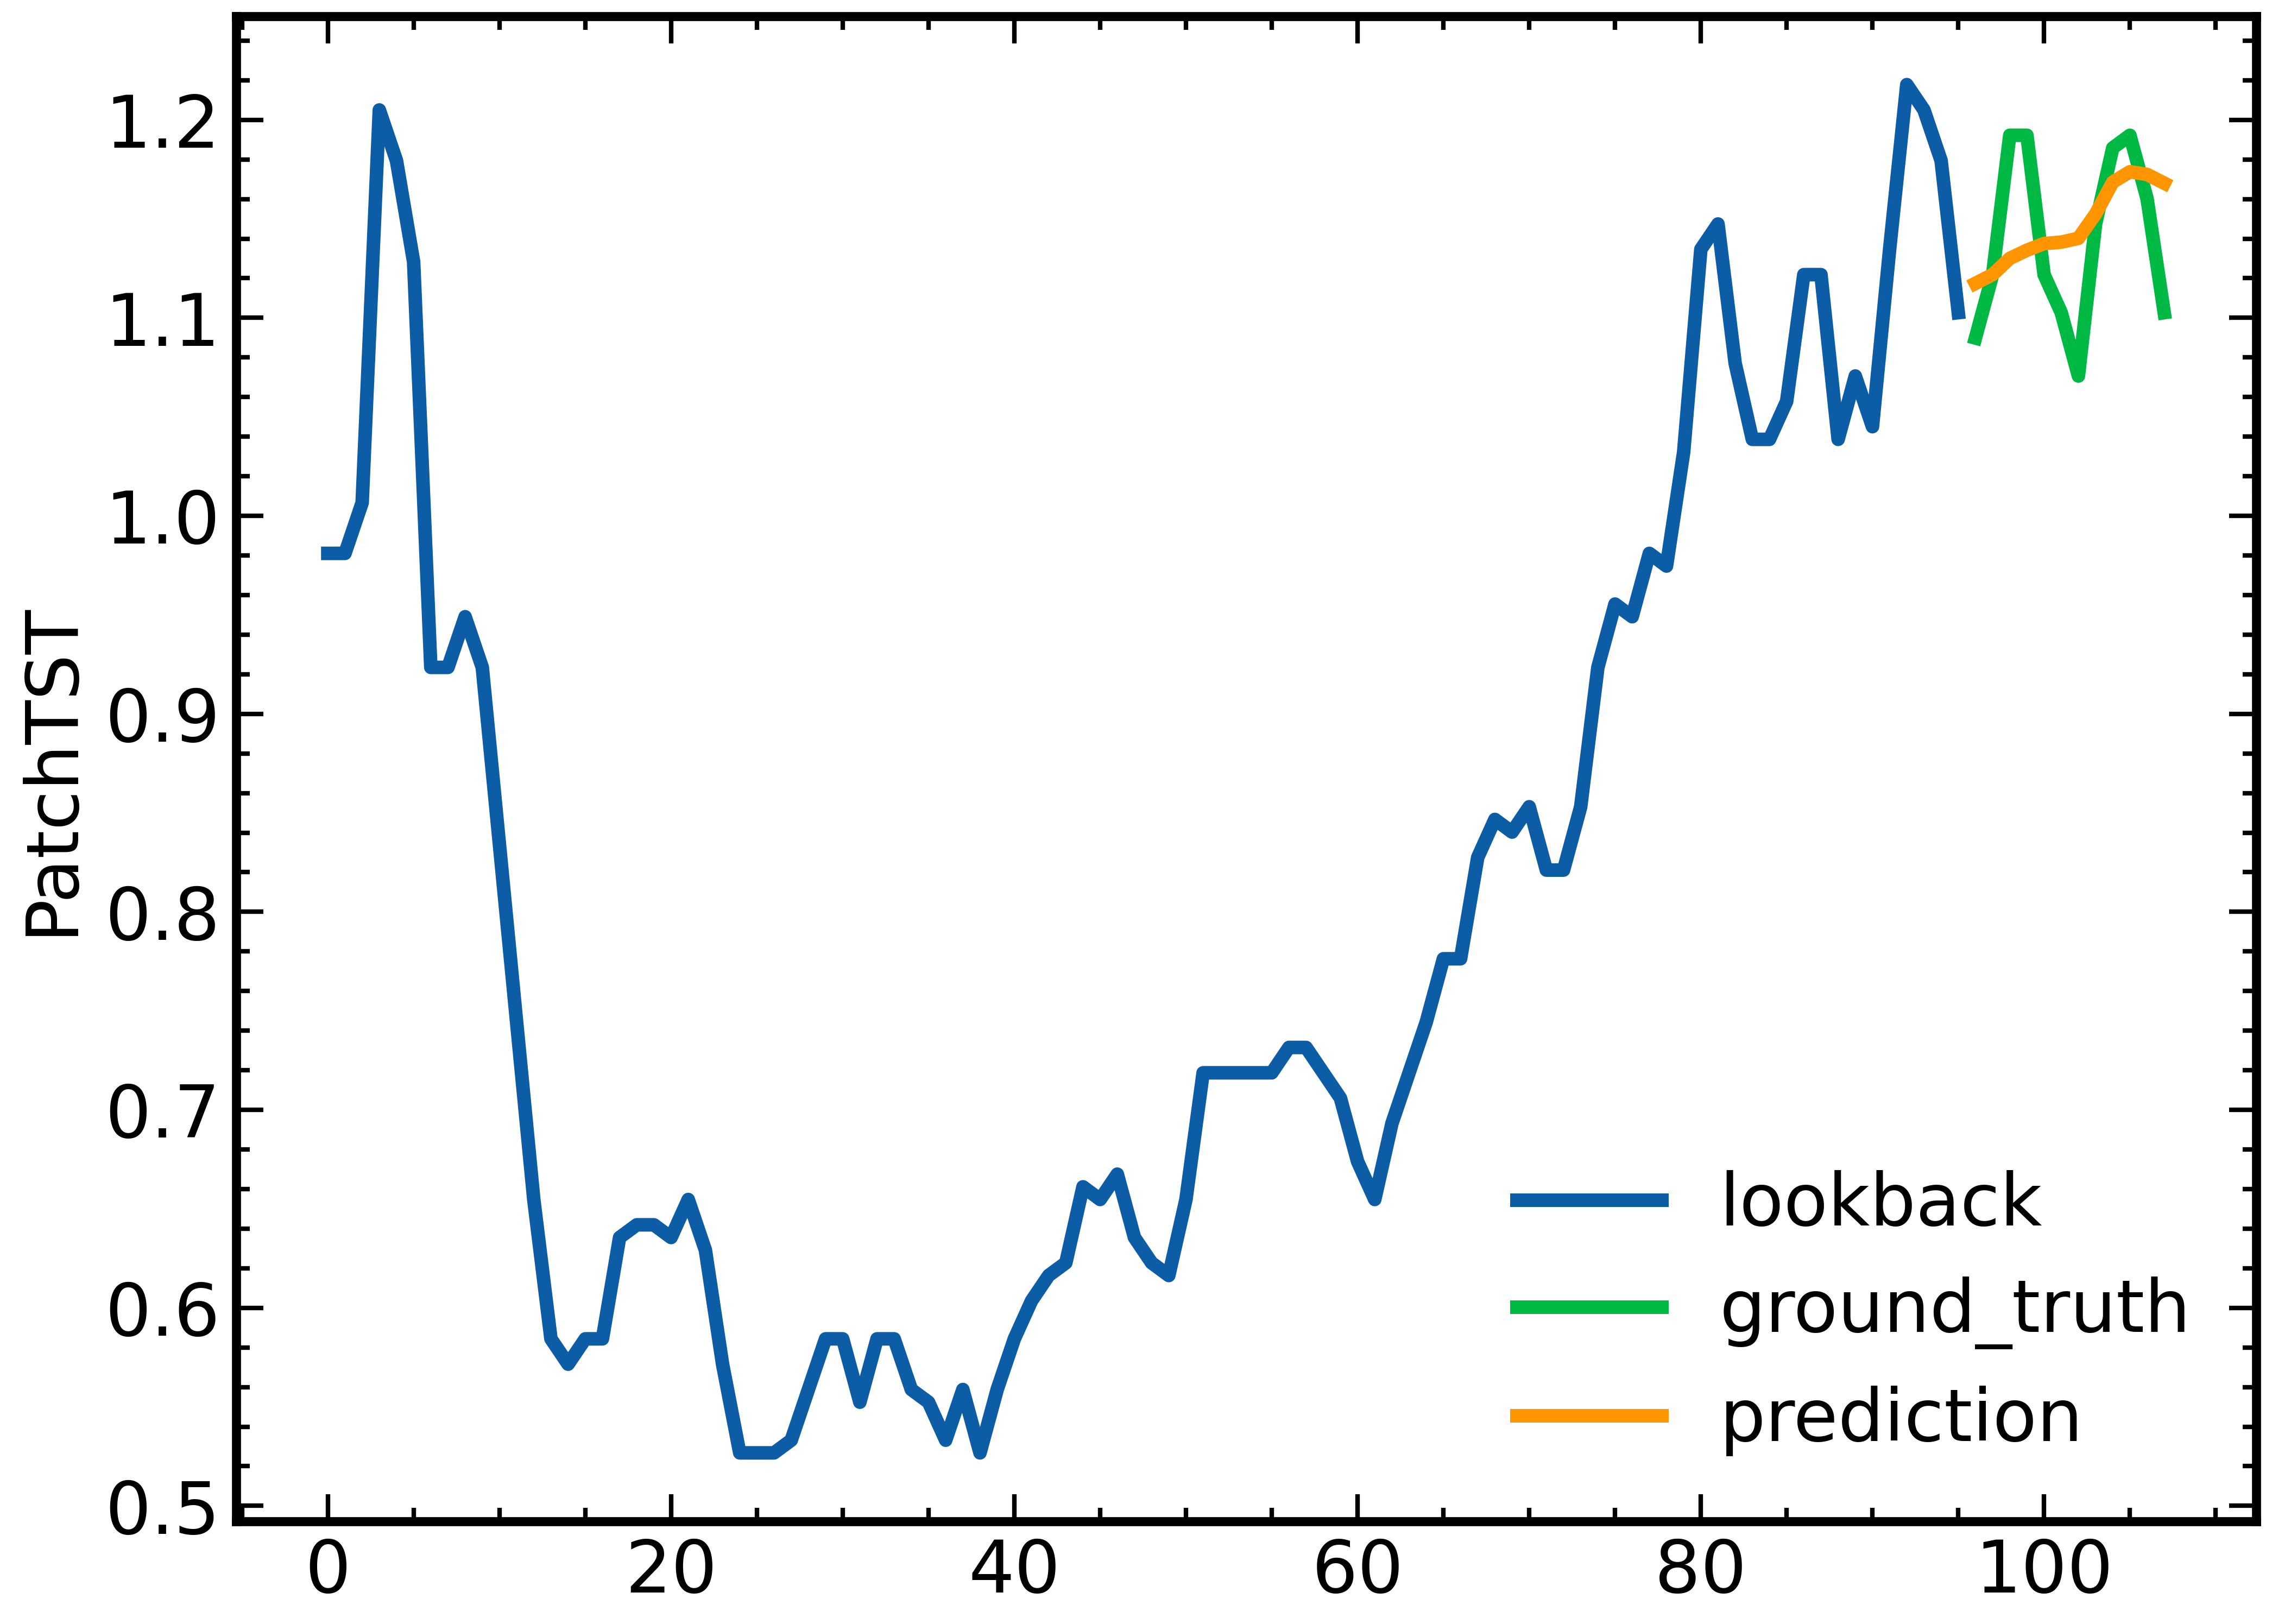

In [93]:
from src.experiments.shortterm import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'PatchTST')



### PAN

train steps: 19649
val steps: 5633
test steps: 2813
tensor([128, 320, 512], dtype=torch.int32)
self.t_index [95, 143]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/PEMS07/w96h1s12/8a8baaa19a917ec97615e6bc090c66aa/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

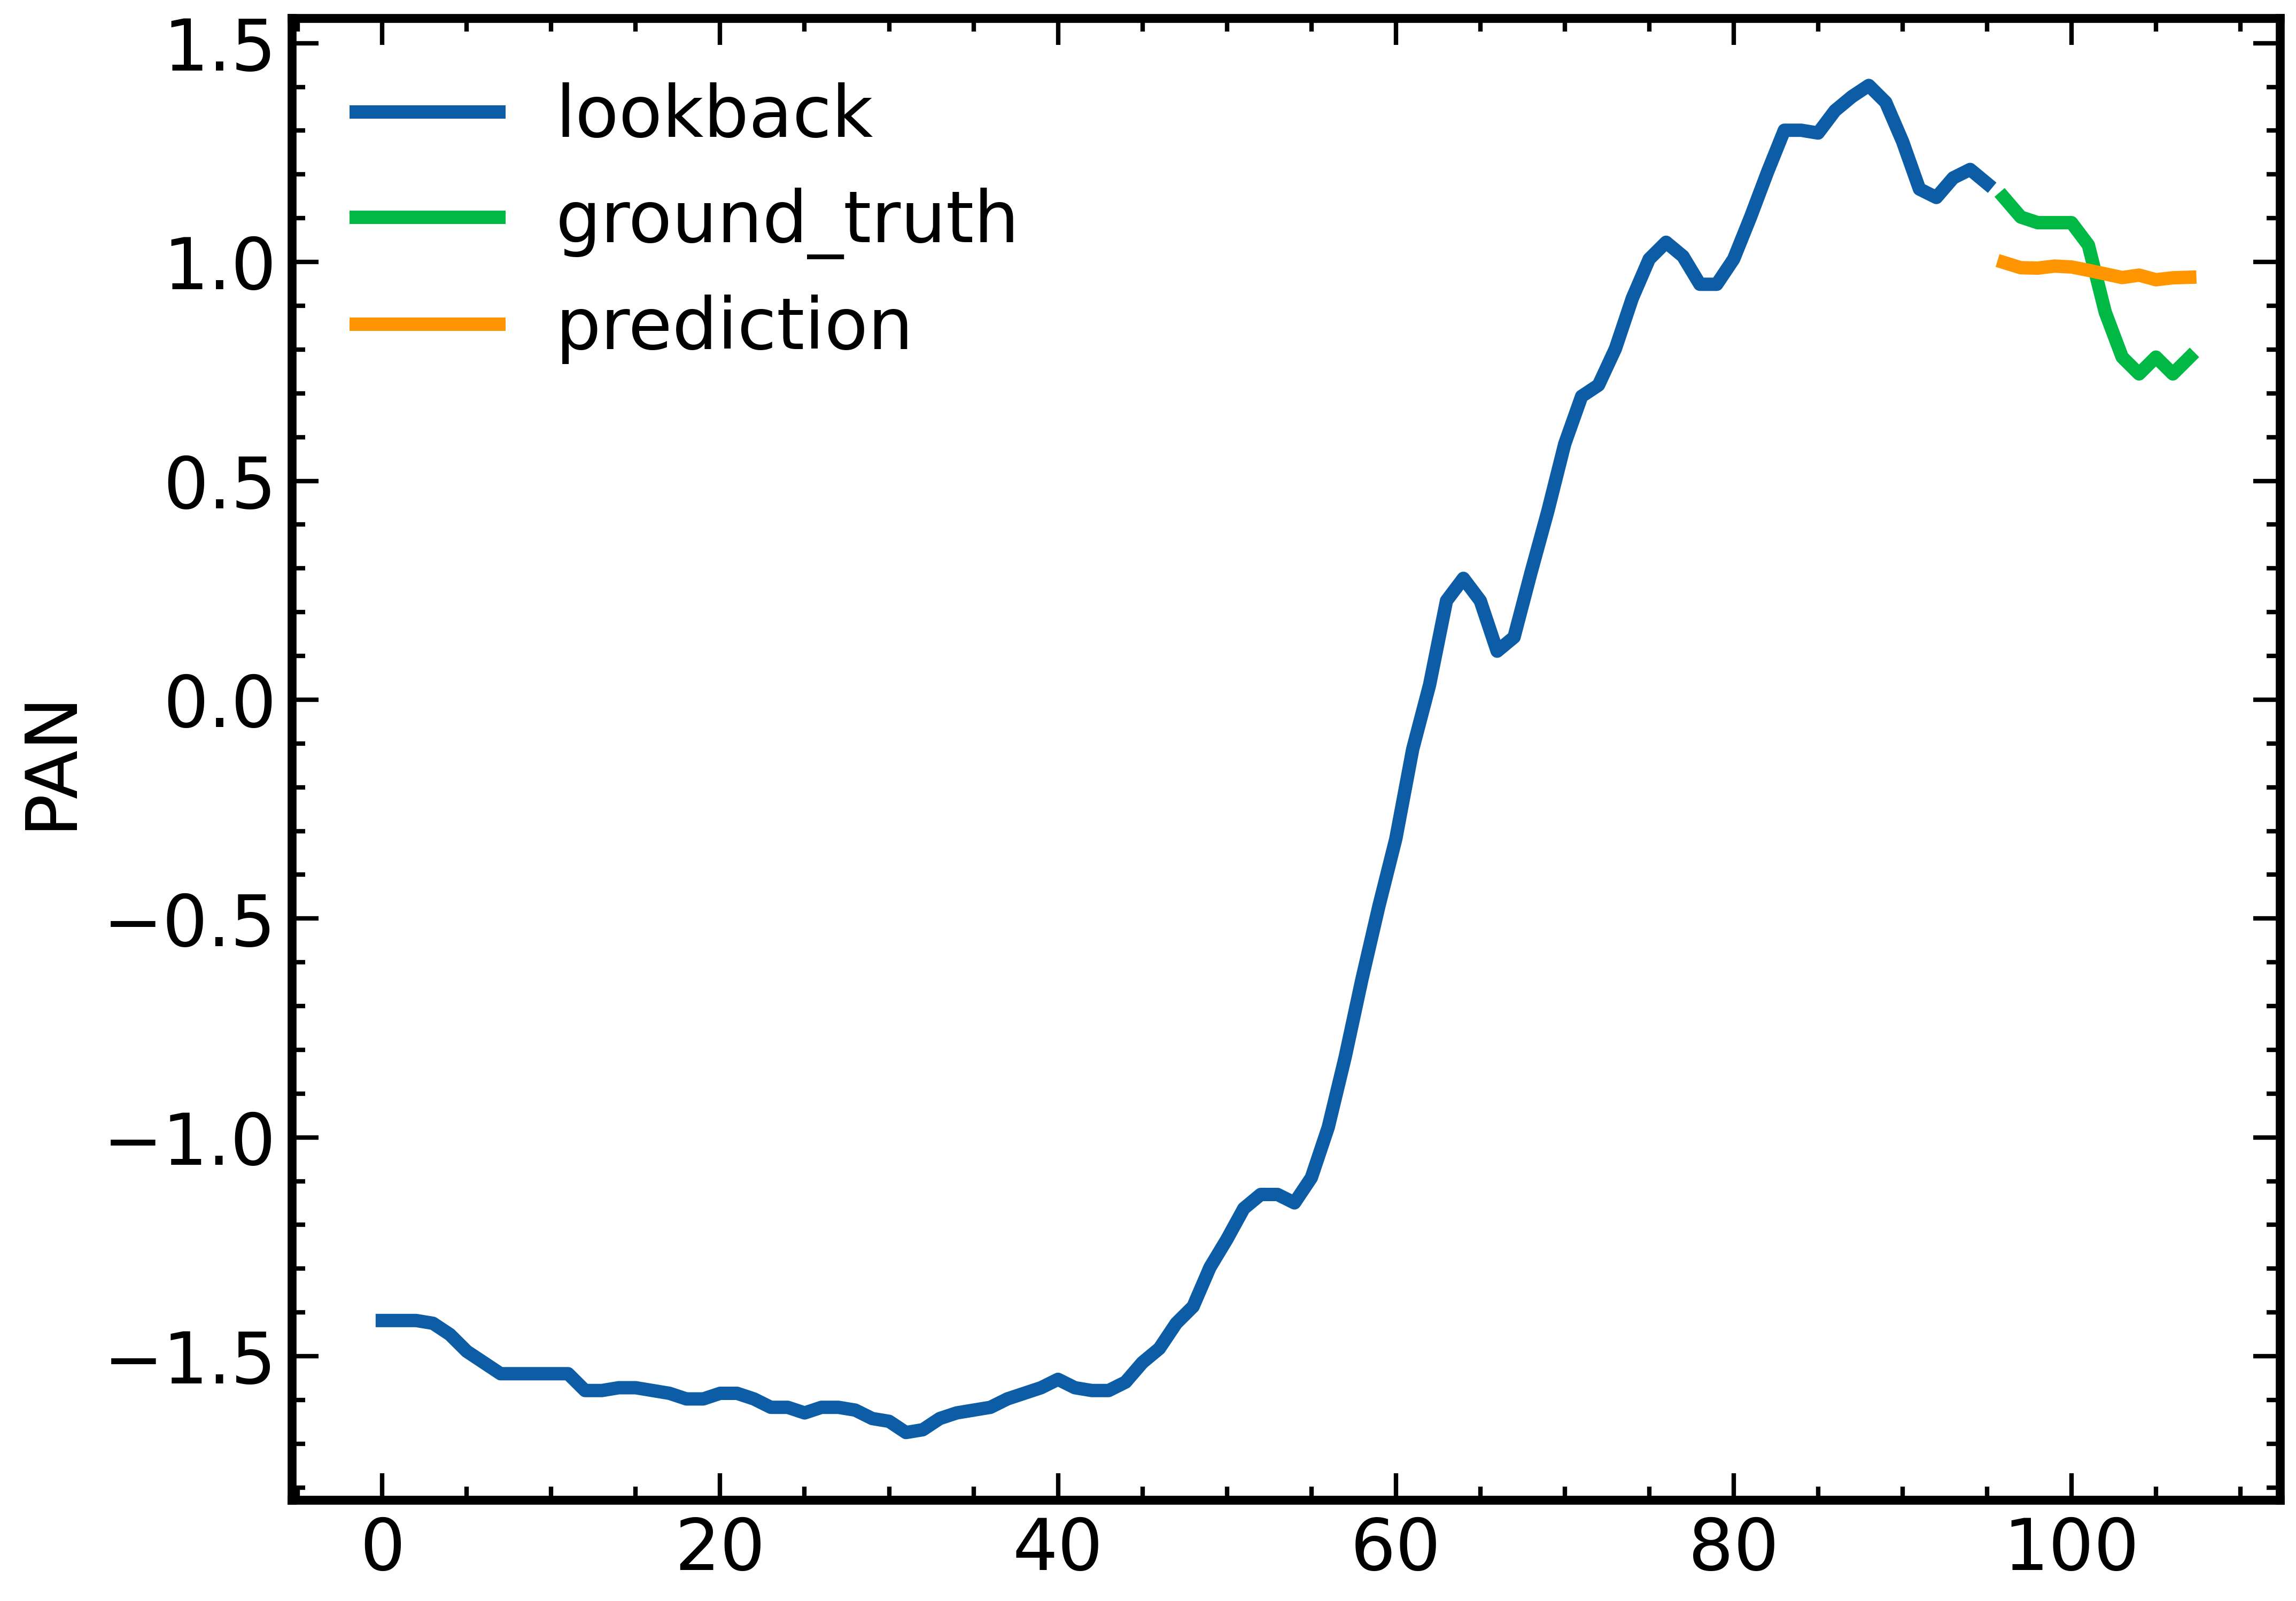

In [90]:
from src.experiments.shortterm import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'PAN')

